In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [96]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [97]:
masses = [ 10 ]
couplings = [-10]
affect = False
isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]
non_nuc_neu_subtypes = [ 'nuc', 'plas', 'brem', 'phot', 'pair', 'reco' ]

In [98]:
runs = dict()
for m in masses:
    for g in couplings:
        try:
            key = f'm{m:04.1f}_g{g:+05.2f}{"" if affect else "_0"}'
    
            run = pd.read_csv(f'csv/{key}/index.csv')
            run['mass (Msun)'] = float(key[1:5])
            run['coupling'] = float(key[7:])
            # run['slices'] = [
            #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
            #     for model in run['slice']
            # ]
        
            runs[key] = run
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m10.0_g-10.00_0,	

In [99]:
run = runs['m10.0_g-10.00_0']

In [100]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),...,surface lum_nuc_neu (ergs/s),surface lum_non_nuc_neu (ergs/s),surface lum_plas_neu (ergs/s),surface lum_brem_neu (ergs/s),surface lum_phot_neu (ergs/s),surface lum_pair_neu (ergs/s),surface lum_reco_neu (ergs/s),surface lum_nuc_gamma (ergs/s),surface lum_grav_gamma (ergs/s),MESA surface lum_gamma (ergs/s)
0,1.0,10.0,-10.0,1.000000e-05,2.829227e+07,0.000010,7.259217e+05,4394.429335,0.000000e+00,1.446238e+17,...,1.446238e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.614997e+18,0.0,1.272145e+37
1,93.0,10.0,-10.0,1.000000e+03,2.829127e+07,36.959352,8.650261e+05,4506.162609,0.000000e+00,2.334762e+18,...,2.334762e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.835940e+19,0.0,9.611553e+36
2,94.0,10.0,-10.0,1.044351e+03,2.829123e+07,44.351222,8.682757e+05,4148.710462,0.000000e+00,2.486821e+18,...,2.486821e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.616639e+19,0.0,6.827773e+36
3,95.0,10.0,-10.0,1.090920e+03,2.829118e+07,46.568784,8.719895e+05,4147.936041,0.000000e+00,2.654461e+18,...,2.654461e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.763854e+19,0.0,6.760569e+36
4,96.0,10.0,-10.0,1.139817e+03,2.829113e+07,48.897223,8.755199e+05,4149.581365,0.000000e+00,2.840773e+18,...,2.840773e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.902958e+19,0.0,6.708874e+36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,2670.0,10.0,-10.0,2.829227e+07,6.765593e-03,0.001761,2.395913e+09,3136.165083,-2.773171e+34,3.842521e+43,...,3.118633e+41,3.811335e+43,3.545261e+41,2.726924e+41,1.212089e+42,3.627384e+43,2.034344e+38,1.517677e+43,0.0,2.248743e+38
2579,2671.0,10.0,-10.0,2.829227e+07,5.034290e-03,0.001731,2.407436e+09,3136.147964,-2.772126e+34,3.896605e+43,...,3.261339e+41,3.863991e+43,3.670064e+41,2.804334e+41,1.232655e+42,3.675962e+43,2.016535e+38,1.512009e+43,0.0,2.248696e+38
2580,2672.0,10.0,-10.0,2.829227e+07,3.331438e-03,0.001703,2.418952e+09,3136.134025,-2.779022e+34,3.952212e+43,...,3.437123e+41,3.917841e+43,3.798673e+41,2.883301e+41,1.253426e+42,3.725659e+43,1.995162e+38,1.531300e+43,0.0,2.248658e+38
2581,2673.0,10.0,-10.0,2.829227e+07,1.653925e-03,0.001678,2.430528e+09,3136.121566,-2.786231e+34,4.010055e+43,...,3.610650e+41,3.973949e+43,3.931887e+41,2.964388e+41,1.274657e+42,3.777501e+43,1.979418e+38,1.531537e+43,0.0,2.248623e+38


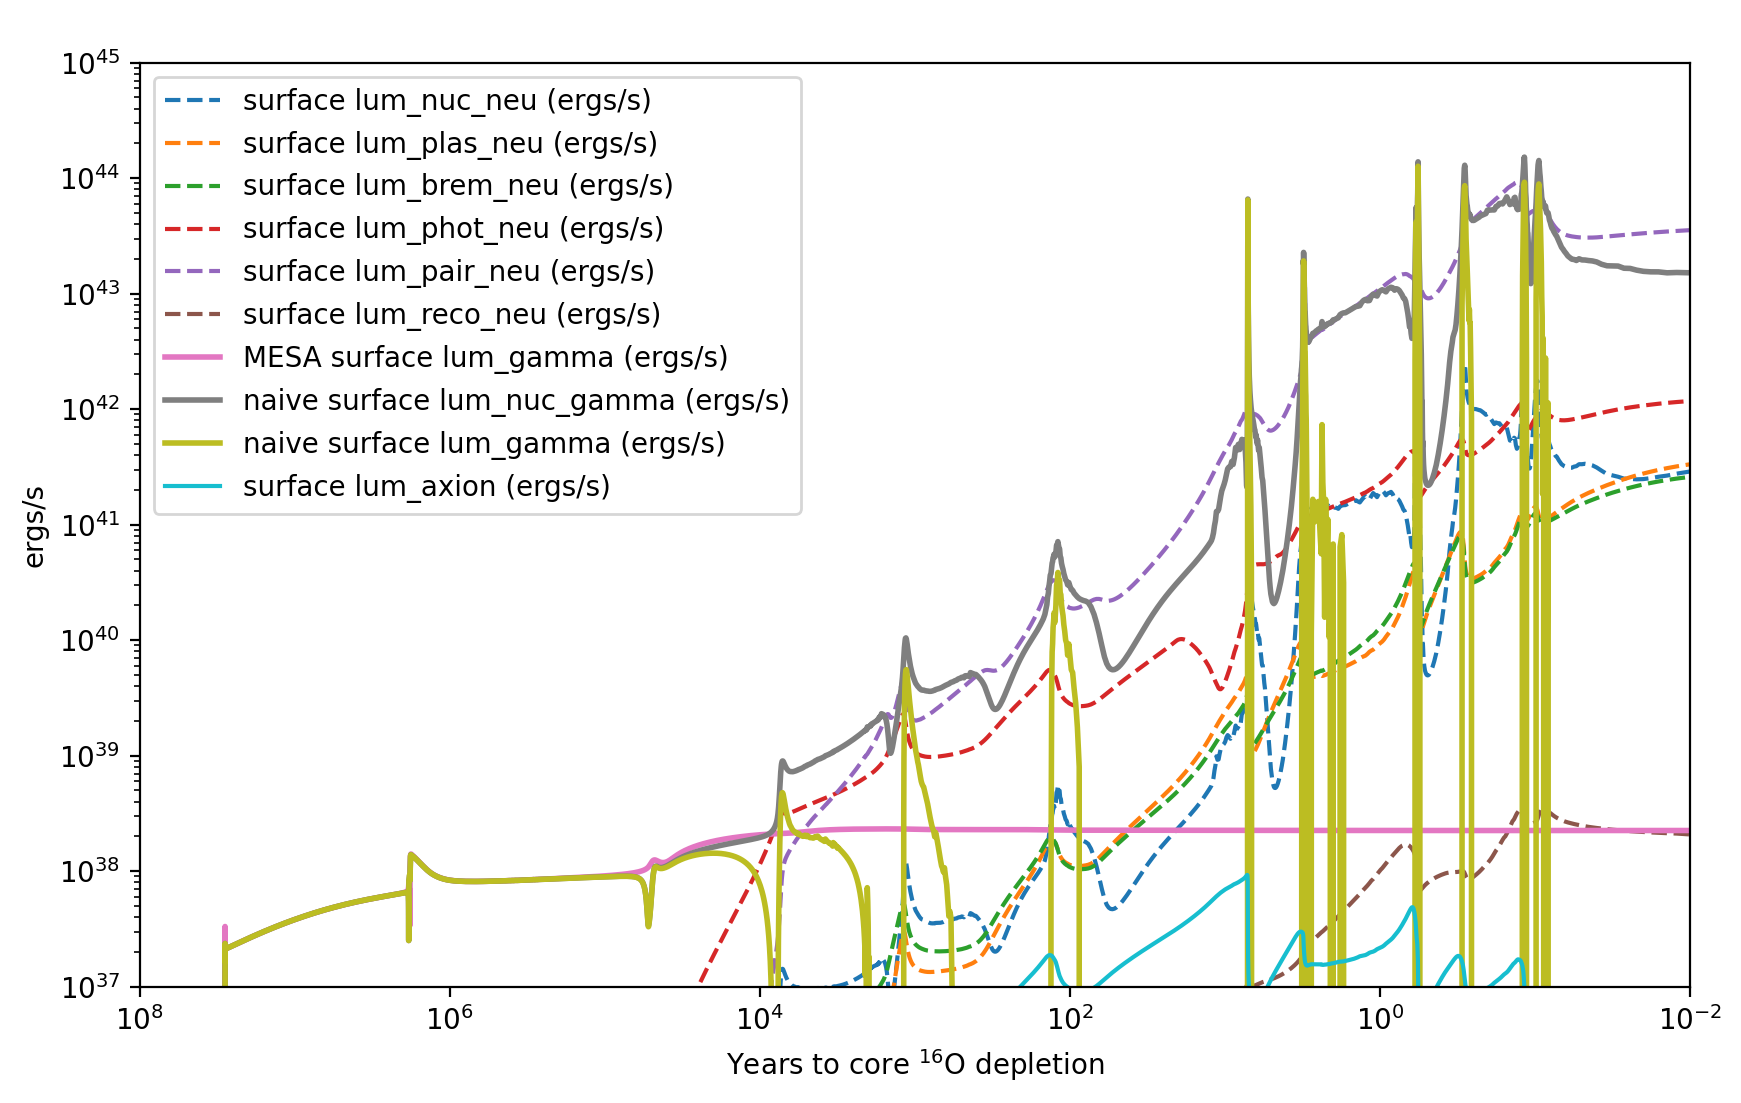

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))

x = run['time to core O depletion (years)']

neusum = np.zeros_like(x)
for neu_type in non_nuc_neu_subtypes:
    label = f'surface lum_{neu_type}_neu (ergs/s)'
    y = run[label]
    neusum += y
    plt.plot(x, y, label=label, ls='--')

label = 'MESA surface lum_gamma (ergs/s)'
plt.plot(x, run[label], label=label, lw=2)
plt.plot(x, 
         run['surface lum_nuc_gamma (ergs/s)'], 
         label='naive surface lum_nuc_gamma (ergs/s)', lw=2)

plt.plot(x, 
         run['surface lum_nuc_gamma (ergs/s)'] 
         - neusum
         + run['surface lum_nuc_neu (ergs/s)']
         + run['surface lum_grav_gamma (ergs/s)'], 
         label='naive surface lum_gamma (ergs/s)', lw=2)

plt.plot(x, run['surface lum_a (ergs/s)'], label='surface lum_axion (ergs/s)')
plt.legend()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim(1e37, 1e45)
plt.xlim(1e8, 1e-2)
plt.title('Luminosities of 10 Msun star', c='white')
plt.xlabel('Years to core $^{16}$O depletion')
plt.ylabel('ergs/s')
# plt.legend()
plt.savefig('lums.png')
plt.show()


Text(0, 0.5, 'Number of time steps')

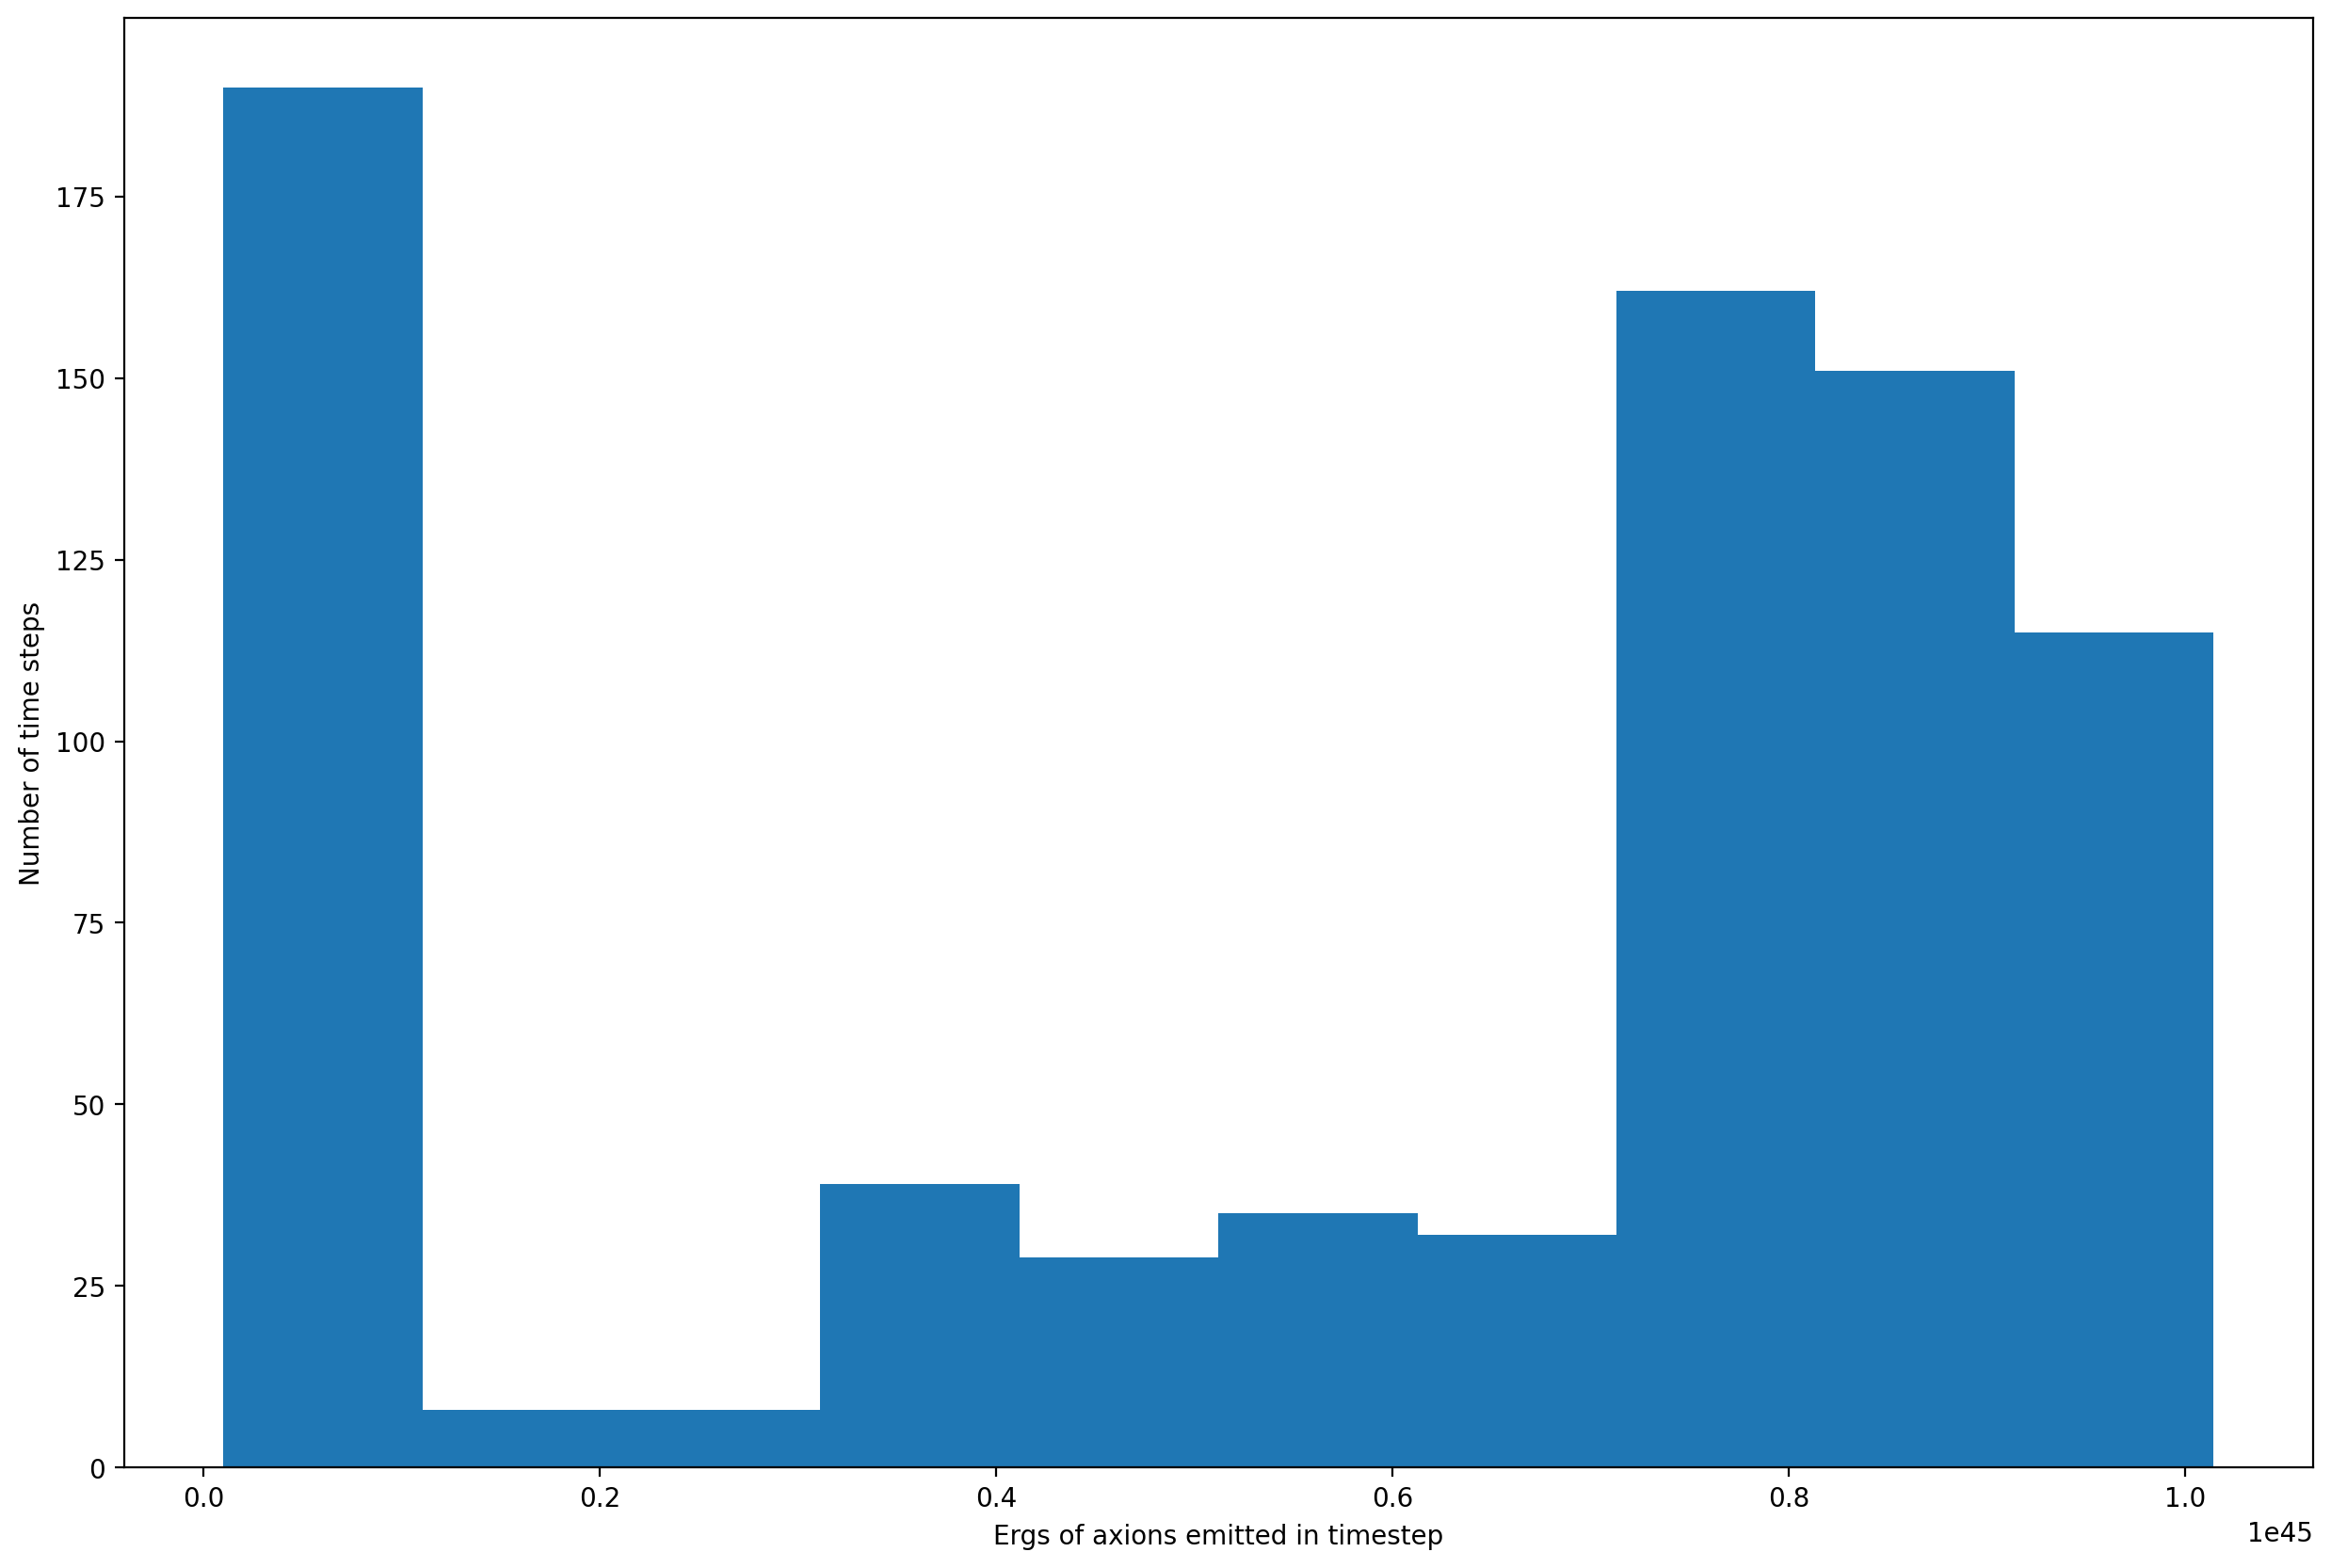

In [50]:
blah = []
for (i, key) in enumerate(runs):
    run = runs[key]
    blah.append(run['dt (years)'] * 3.154e+7 * run['surface lum_a (ergs/s)'])
blahs = np.concatenate(blah)
plt.hist(blahs[blahs>1e43], bins=10)
plt.xlabel("Ergs of axions emitted in timestep")
plt.ylabel("Number of time steps")

In [51]:
plt.hist(ages, bins=100)
plt.xlim(0, 1e8)

NameError: name 'ages' is not defined

In [ ]:
run

In [ ]:
for G in [-10, -9, -8]:
    fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                            gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                           )
    main_ax.set_facecolor('black')
    fig.colorbar(colormap_m, label='mass', cax=color_ax)
    ###
    
    plt.sca(main_ax)
    main_ax.set_yscale('log')
    # main_ax.set_xscale('log')
    # plt.ylim(1e33, 1e36)
    
    M = [15]
    
    for key in reversed(runs):
        run = runs[key]
        mass = run['mass (Msun)'][0]
        g = run['coupling'][0]
        if g != G or mass not in M: continue
        x = np.array(run['effective T (K)'])
        y = np.array(run['surface lum_gamma (ergs/s)'])
        Tend = np.array(run['core T (K)'])[-1]
        plt.plot(x, y, c=colormap_m.to_rgba(mass), lw=1)
        # plt.plot(x, y, c=('red' if Tend < Tcut else 'blue'))
    
    plt.xlabel('Surface temperature (K)')
    plt.ylabel('Surface photon luminosity (ergs/s)')
    plt.xlim(5e4, 1e3)
    plt.ylim(1e36, 1e47)
    plt.grid()
    
    plt.title(f'Hertzsprung-Russel, log $g = {G}$', c='white')
    plt.savefig('evol/track_' + str(G) + '.png')
    # plt.legend()
    plt.show()

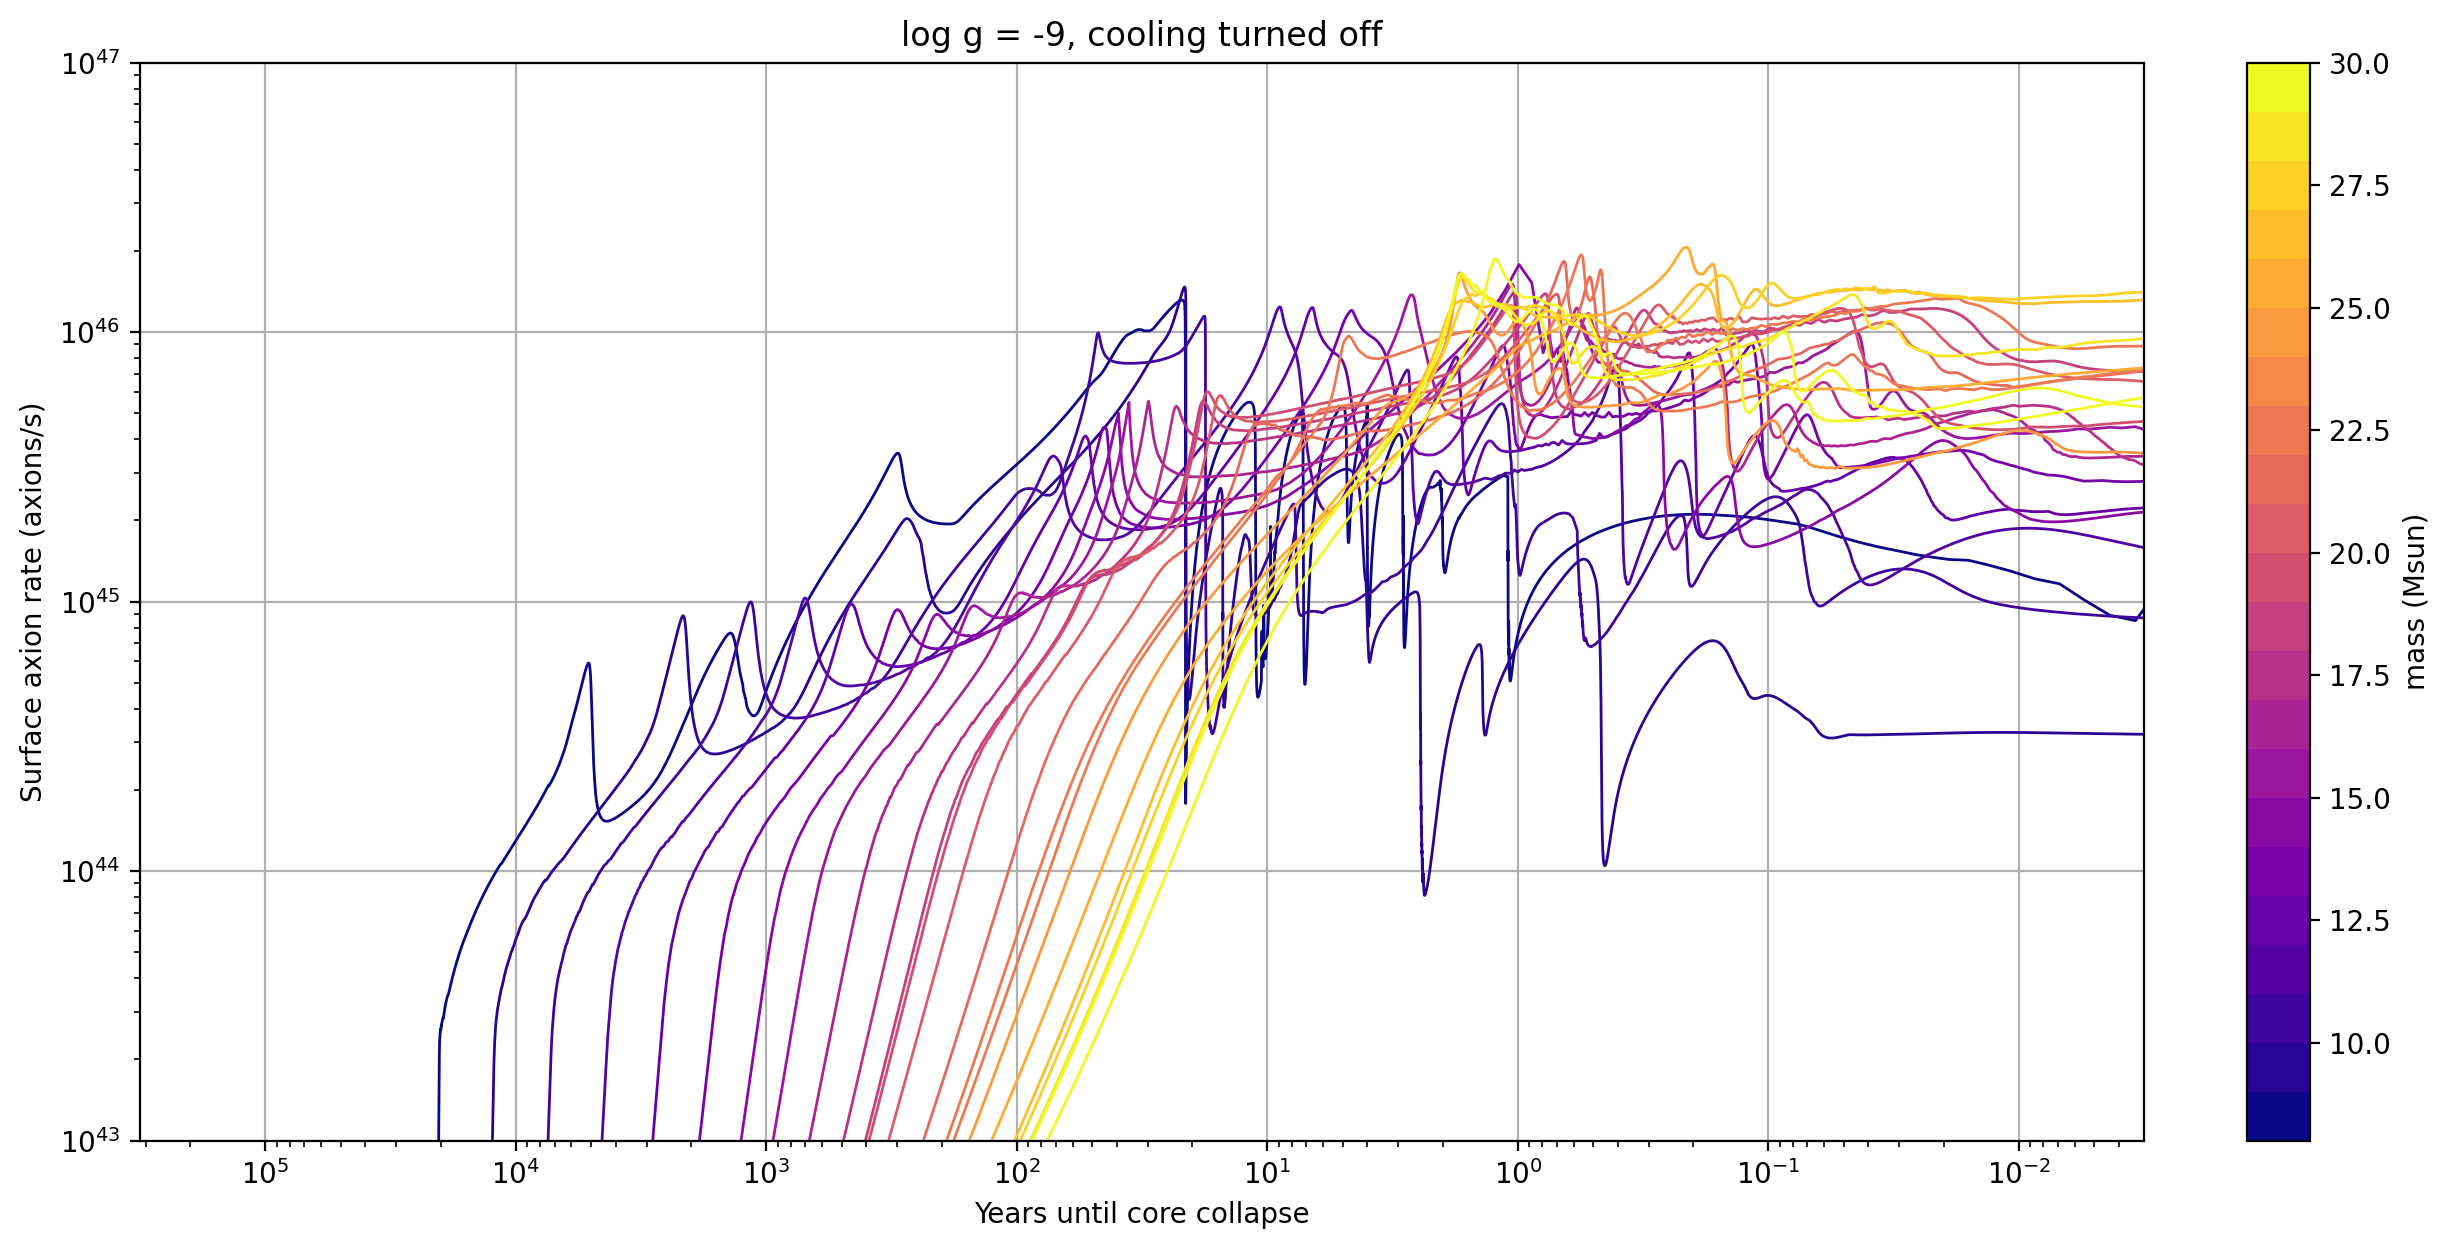

In [13]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(14, 7), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
# main_ax.set_facecolor('black')
fig.colorbar(colormap_m, label='mass (Msun)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]
secyear = 365*24*60*60

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['time to core O depletion (years)'])
    # print(key)
    y = np.array(run['surface num_a (/s)'])*100
    plt.plot(x, y, lw=1, label=key, color=colormap_m.to_rgba(mass))
    # print(m, np.sum(y[x<3.154e+10][1:] * np.diff(y[x<3.154e+10])))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# key = f'm11.0_g-10.00_0'
# run = pd.read_csv(f'../wd/csv/{key}/index.csv')
# x = np.array(run['time to core O depletion (years)']) * 3.154e+7
# y = np.array(run['surface num_a (/s)'])
# i = np.argmax(y)
# x1 = x - x[i]
# plt.plot(x1, y, lw=1, label=key, color='white')
# print('wd', np.sum(y[x1<3.154e+10][1:] * np.diff(y[x1<3.154e+10])))


plt.ylim(1e43, 1e47)
plt.xlim(1e13/secyear, 1e5/secyear)
plt.xlabel('Years until core collapse')
plt.ylabel('Surface axion rate (axions/s)')
plt.grid()

plt.title('log g = -9, cooling turned off', c='black')
# plt.legend()
plt.savefig('rates.png')
plt.show()

/tmp/ipykernel_134731/743641802.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


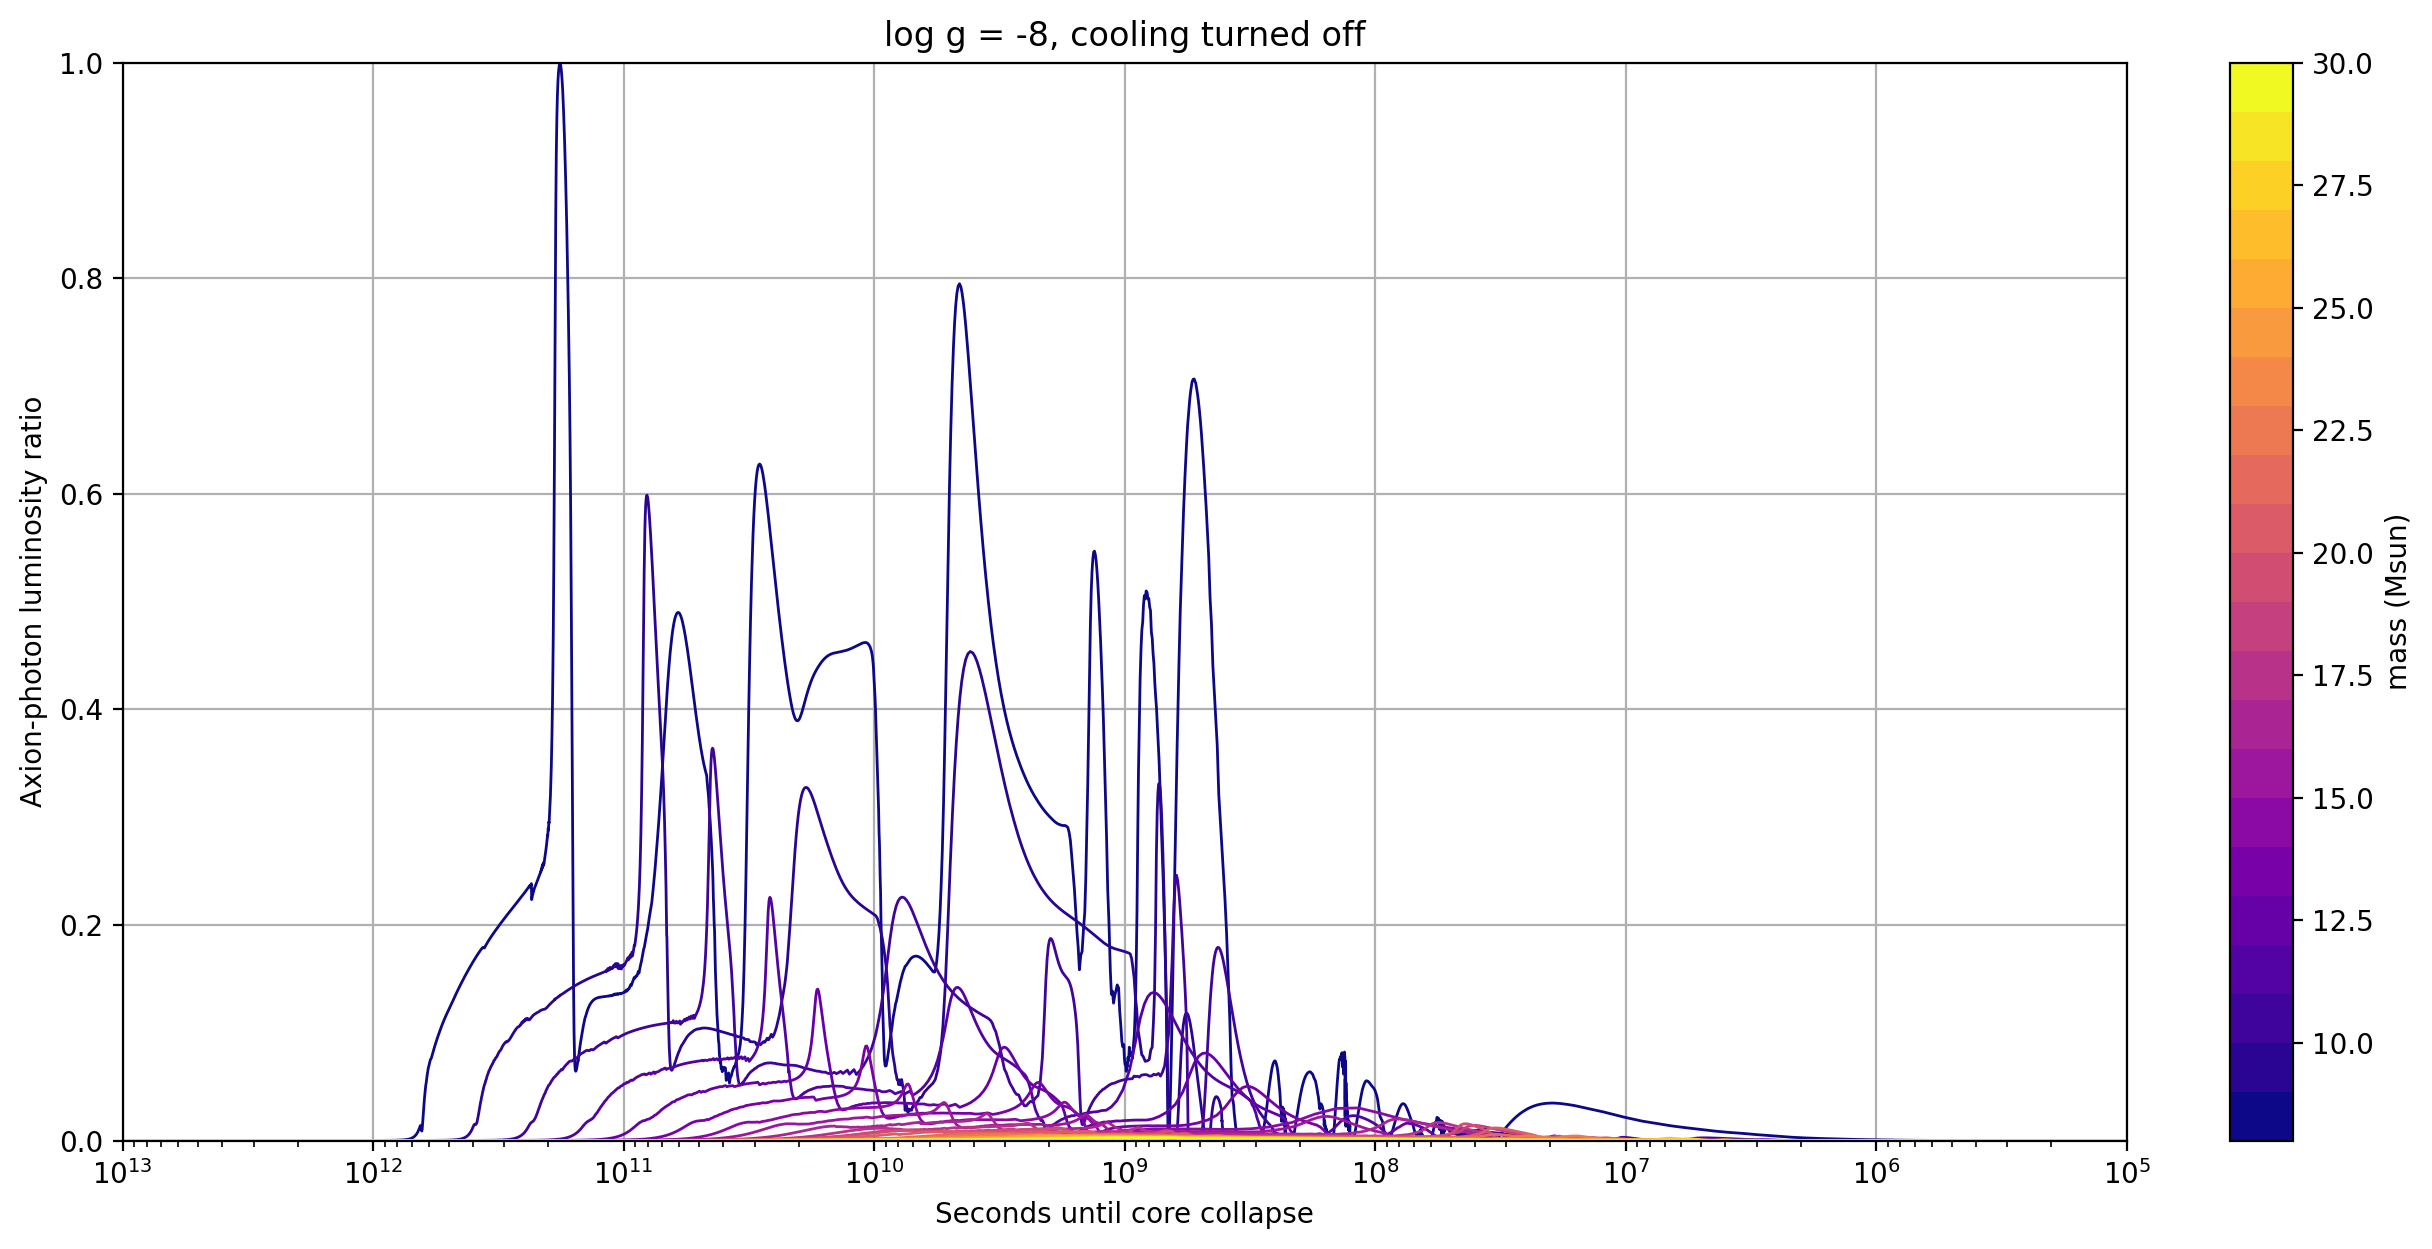

In [14]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(14, 7), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
# main_ax.set_facecolor('black')
fig.colorbar(colormap_m, label='mass (Msun)', cax=color_ax)

###

plt.sca(main_ax)
# main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['time to core O depletion (years)']) * 3.154e+7
    # print(key)
    y = np.array(run['surface lum_a (ergs/s)']) * 1e2
    z = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y/z, lw=1, label=key, color=colormap_m.to_rgba(mass))
    plt.plot(x, z, lw=1, ls='--', color=colormap_m.to_rgba(mass))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(0, 1)
plt.xlim(1e13, 1e5)
plt.xlabel('Seconds until core collapse')
plt.ylabel('Axion-photon luminosity ratio')
plt.grid()

plt.title('log g = -8, cooling turned off', c='black')
# plt.legend()
plt.tight_layout()
plt.show()

2.3066131648148572e+59 -6.566077460882789


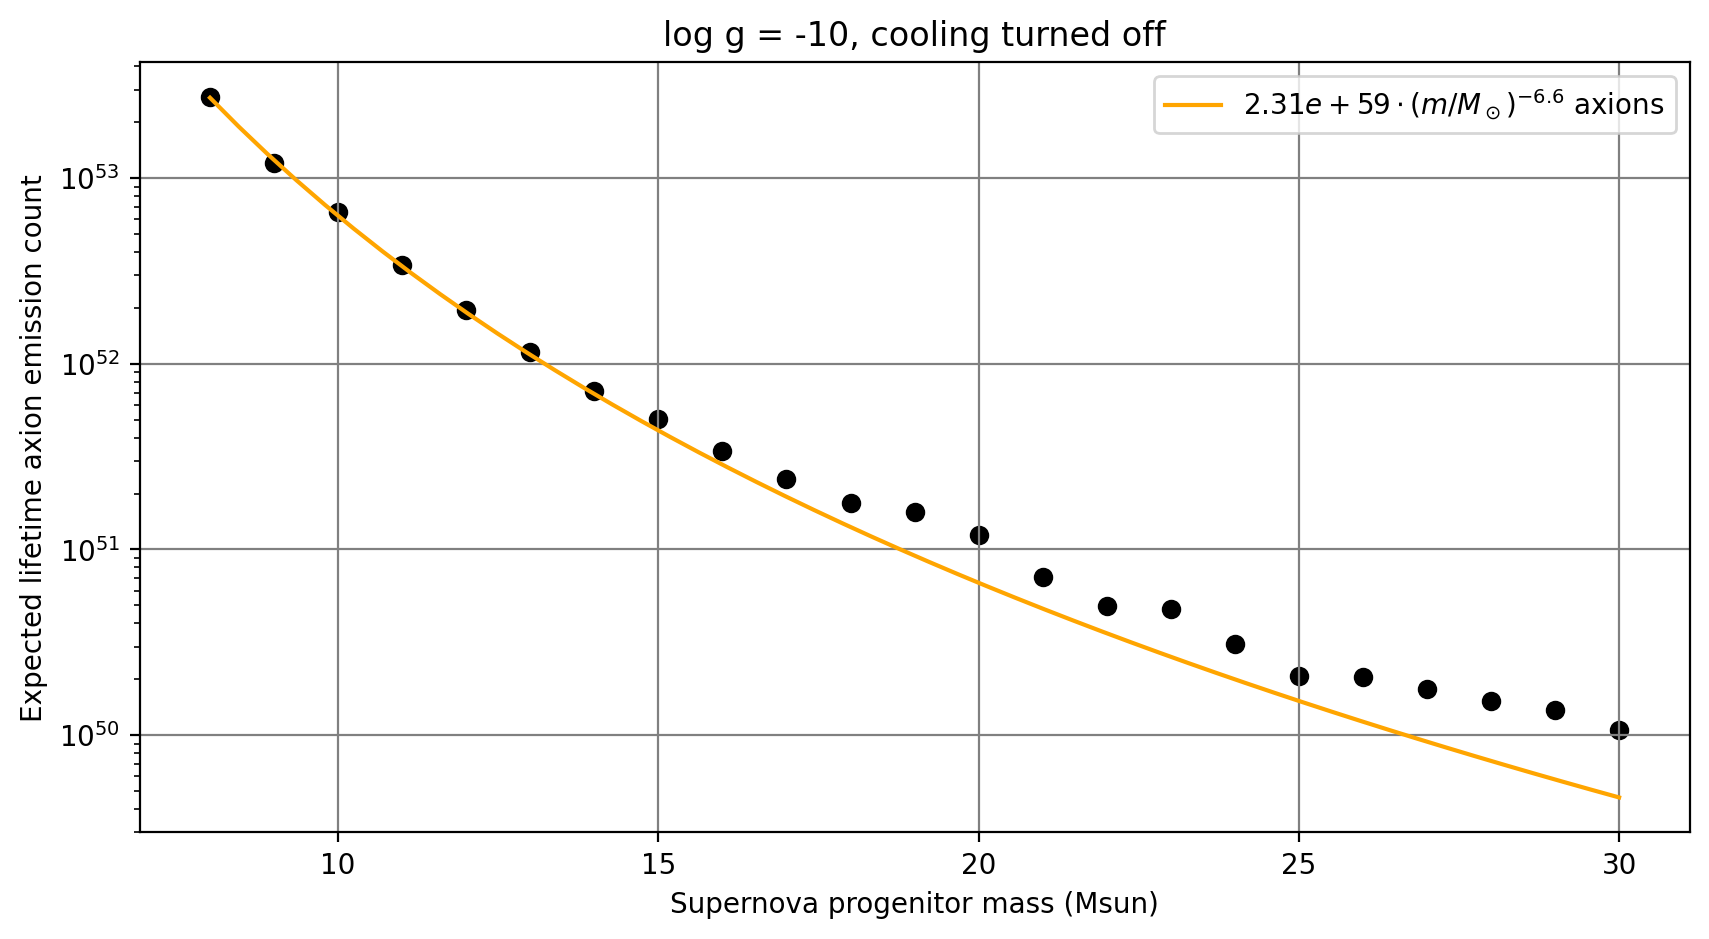

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('white')

###

ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

masses = []
rates = []
for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    masses.append(mass)
    dt = np.array(run['dt (years)'])
    n = np.array(run['surface num_a (/s)'])
    rate = np.sum(dt * n * 3.154e+7)
    # rate = np.sum(dt * n)/np.sum(dt)
    rate *= mass**-2.35 / 0.0447191427629
    rates.append(rate)

masses = np.array(masses)
rates = np.array(rates)

from scipy.optimize import curve_fit
def expfit(x, a, b): 
    return a * (x**b)
[ a, b ], pcov = curve_fit(expfit, masses[masses<15], rates[masses<15], p0=[1e53, -1])
print(a,b)
plt.plot(np.linspace(8, 30), expfit(np.linspace(8, 30), a, b), label=f"${a:.2e}\cdot (m/M_\odot)^{{{b:.1f}}}$ axions", color='orange')
plt.scatter(masses, rates, color='black')

# plt.ylim(1e20, 1e50)
# plt.xlim(8, 25)
plt.xlabel('Supernova progenitor mass (Msun)')
plt.ylabel('Expected lifetime axion emission count')
plt.grid(color='gray')
# plt.ylim(0, 2e54)

plt.title('log g = -10, cooling turned off', c='black')
plt.legend()
# plt.show()

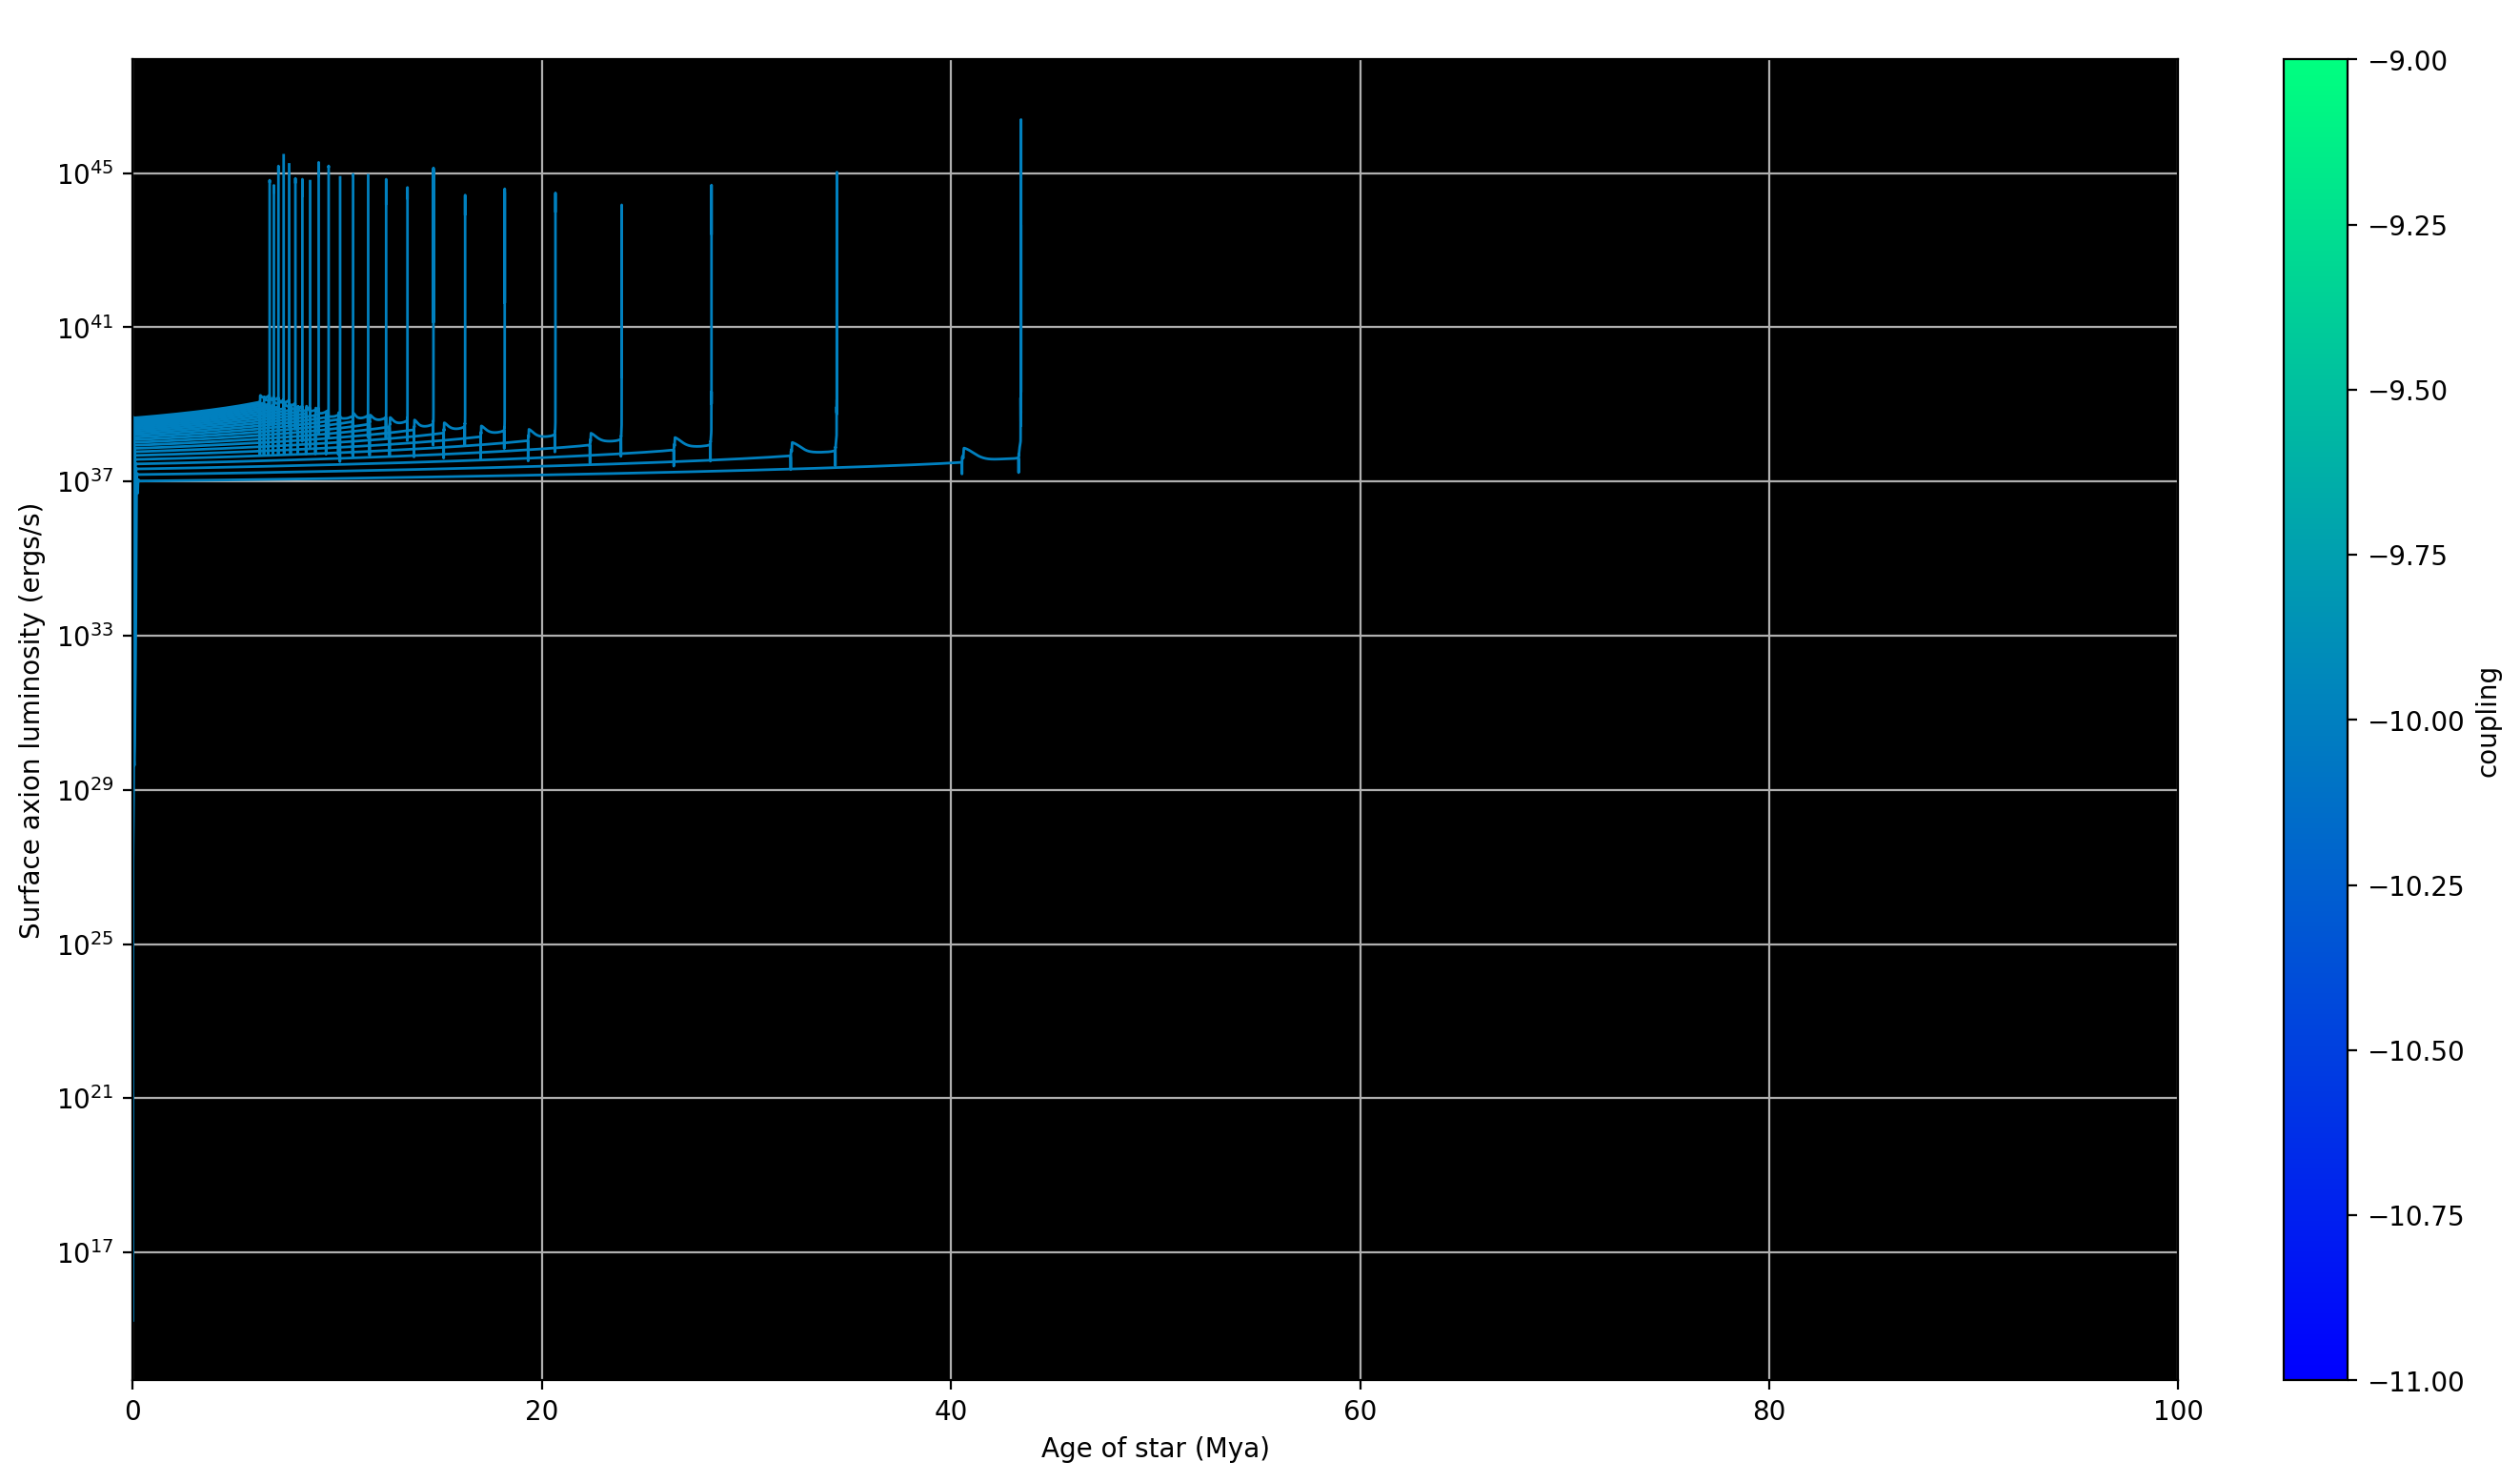

In [16]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in reversed(runs):
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

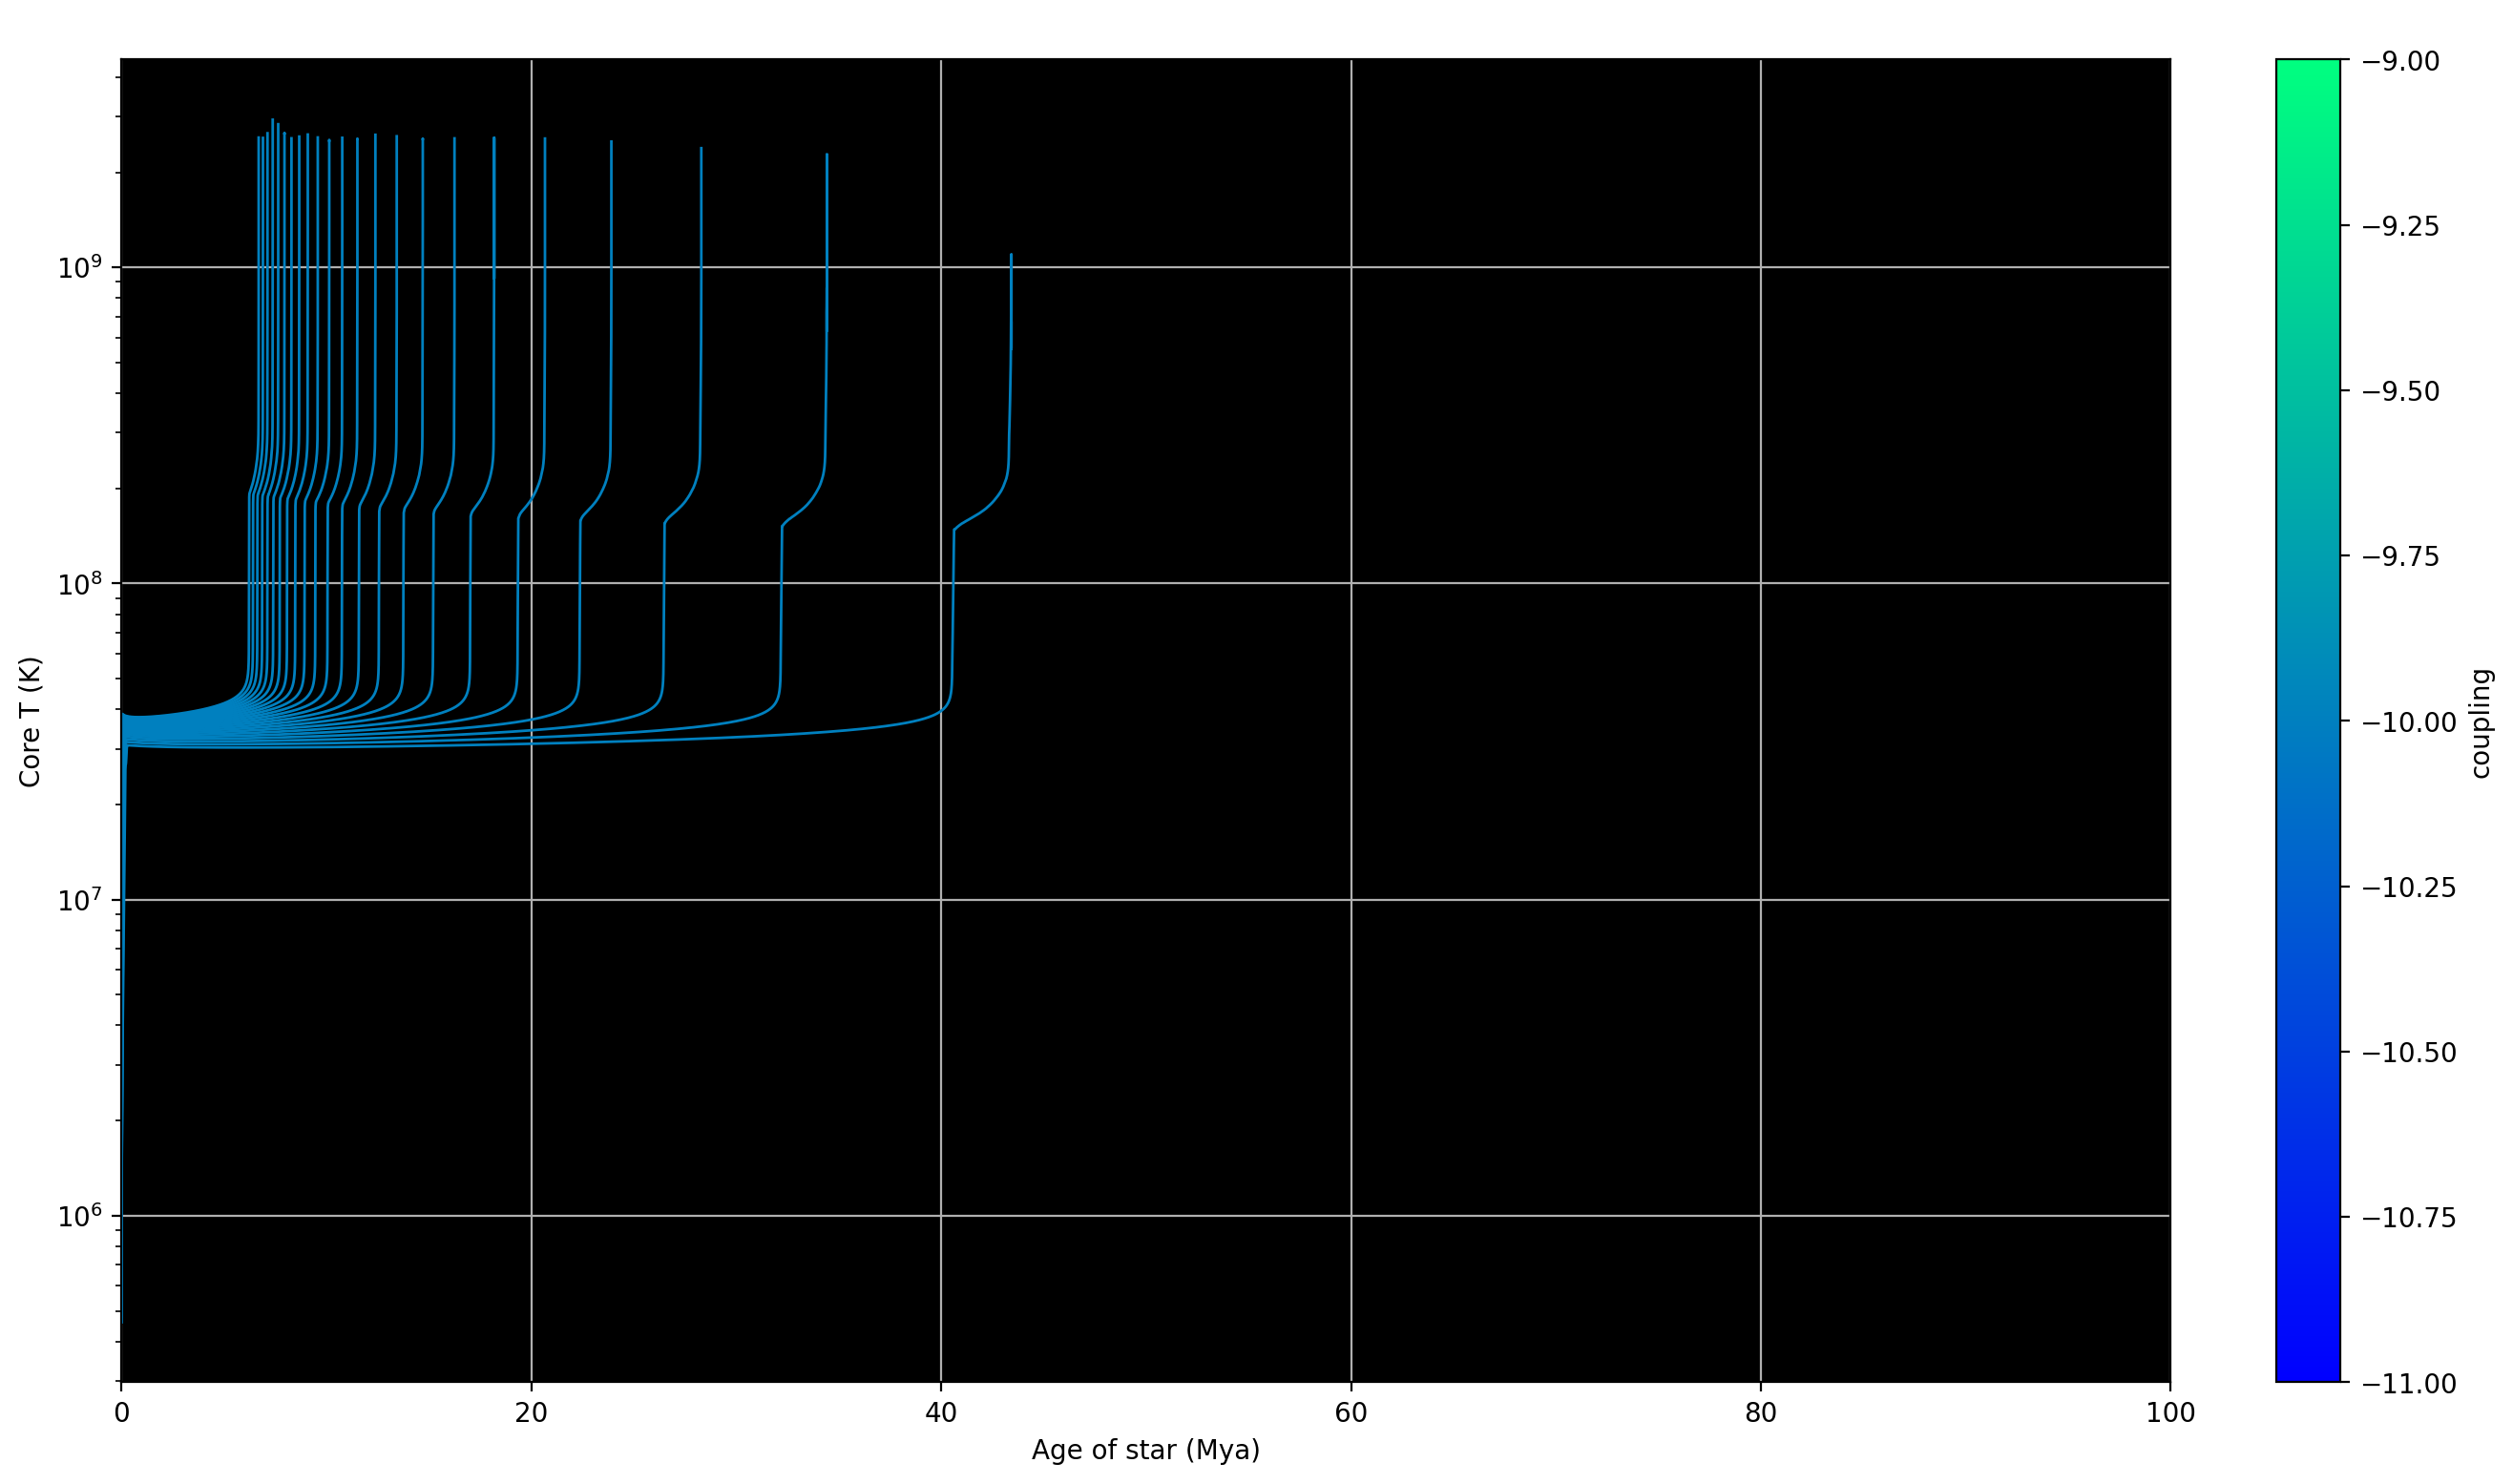

In [17]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)
###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['core T (K)'])
    # plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(1 if np.array(run['core T (K)'])[-1] < Tcut else 2), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Core T (K)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

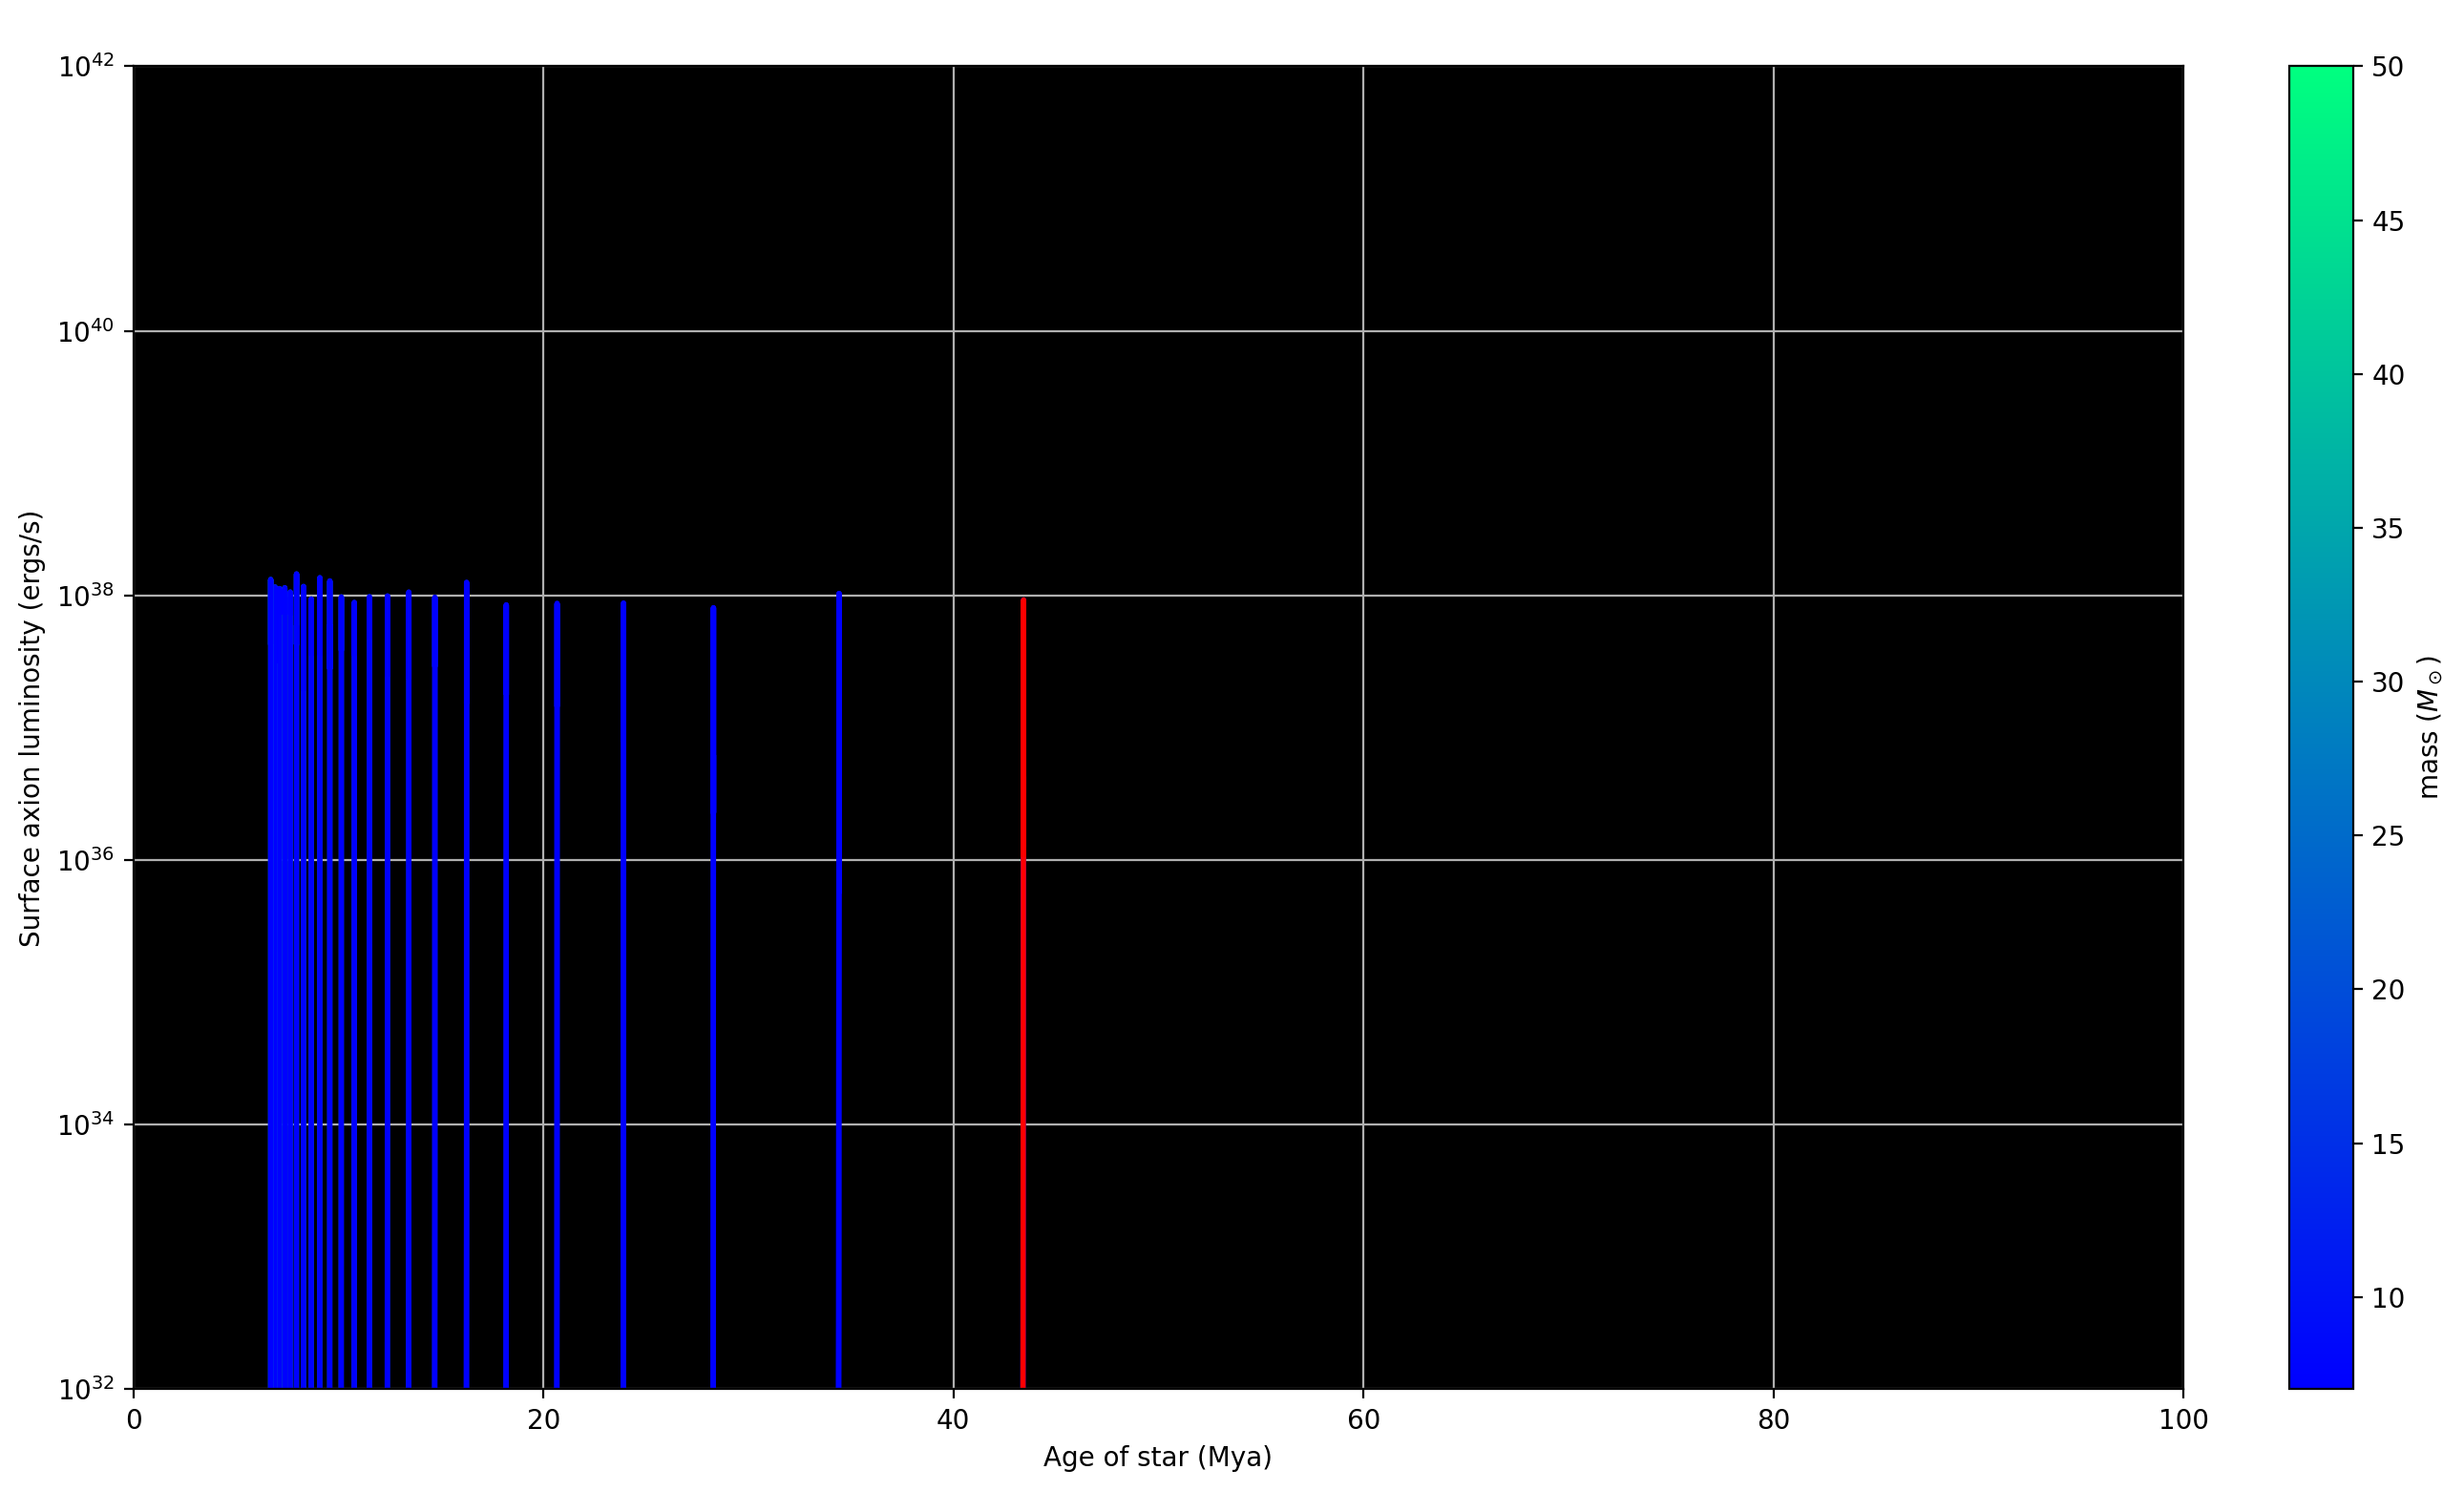

In [18]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_a (ergs/s)'])
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

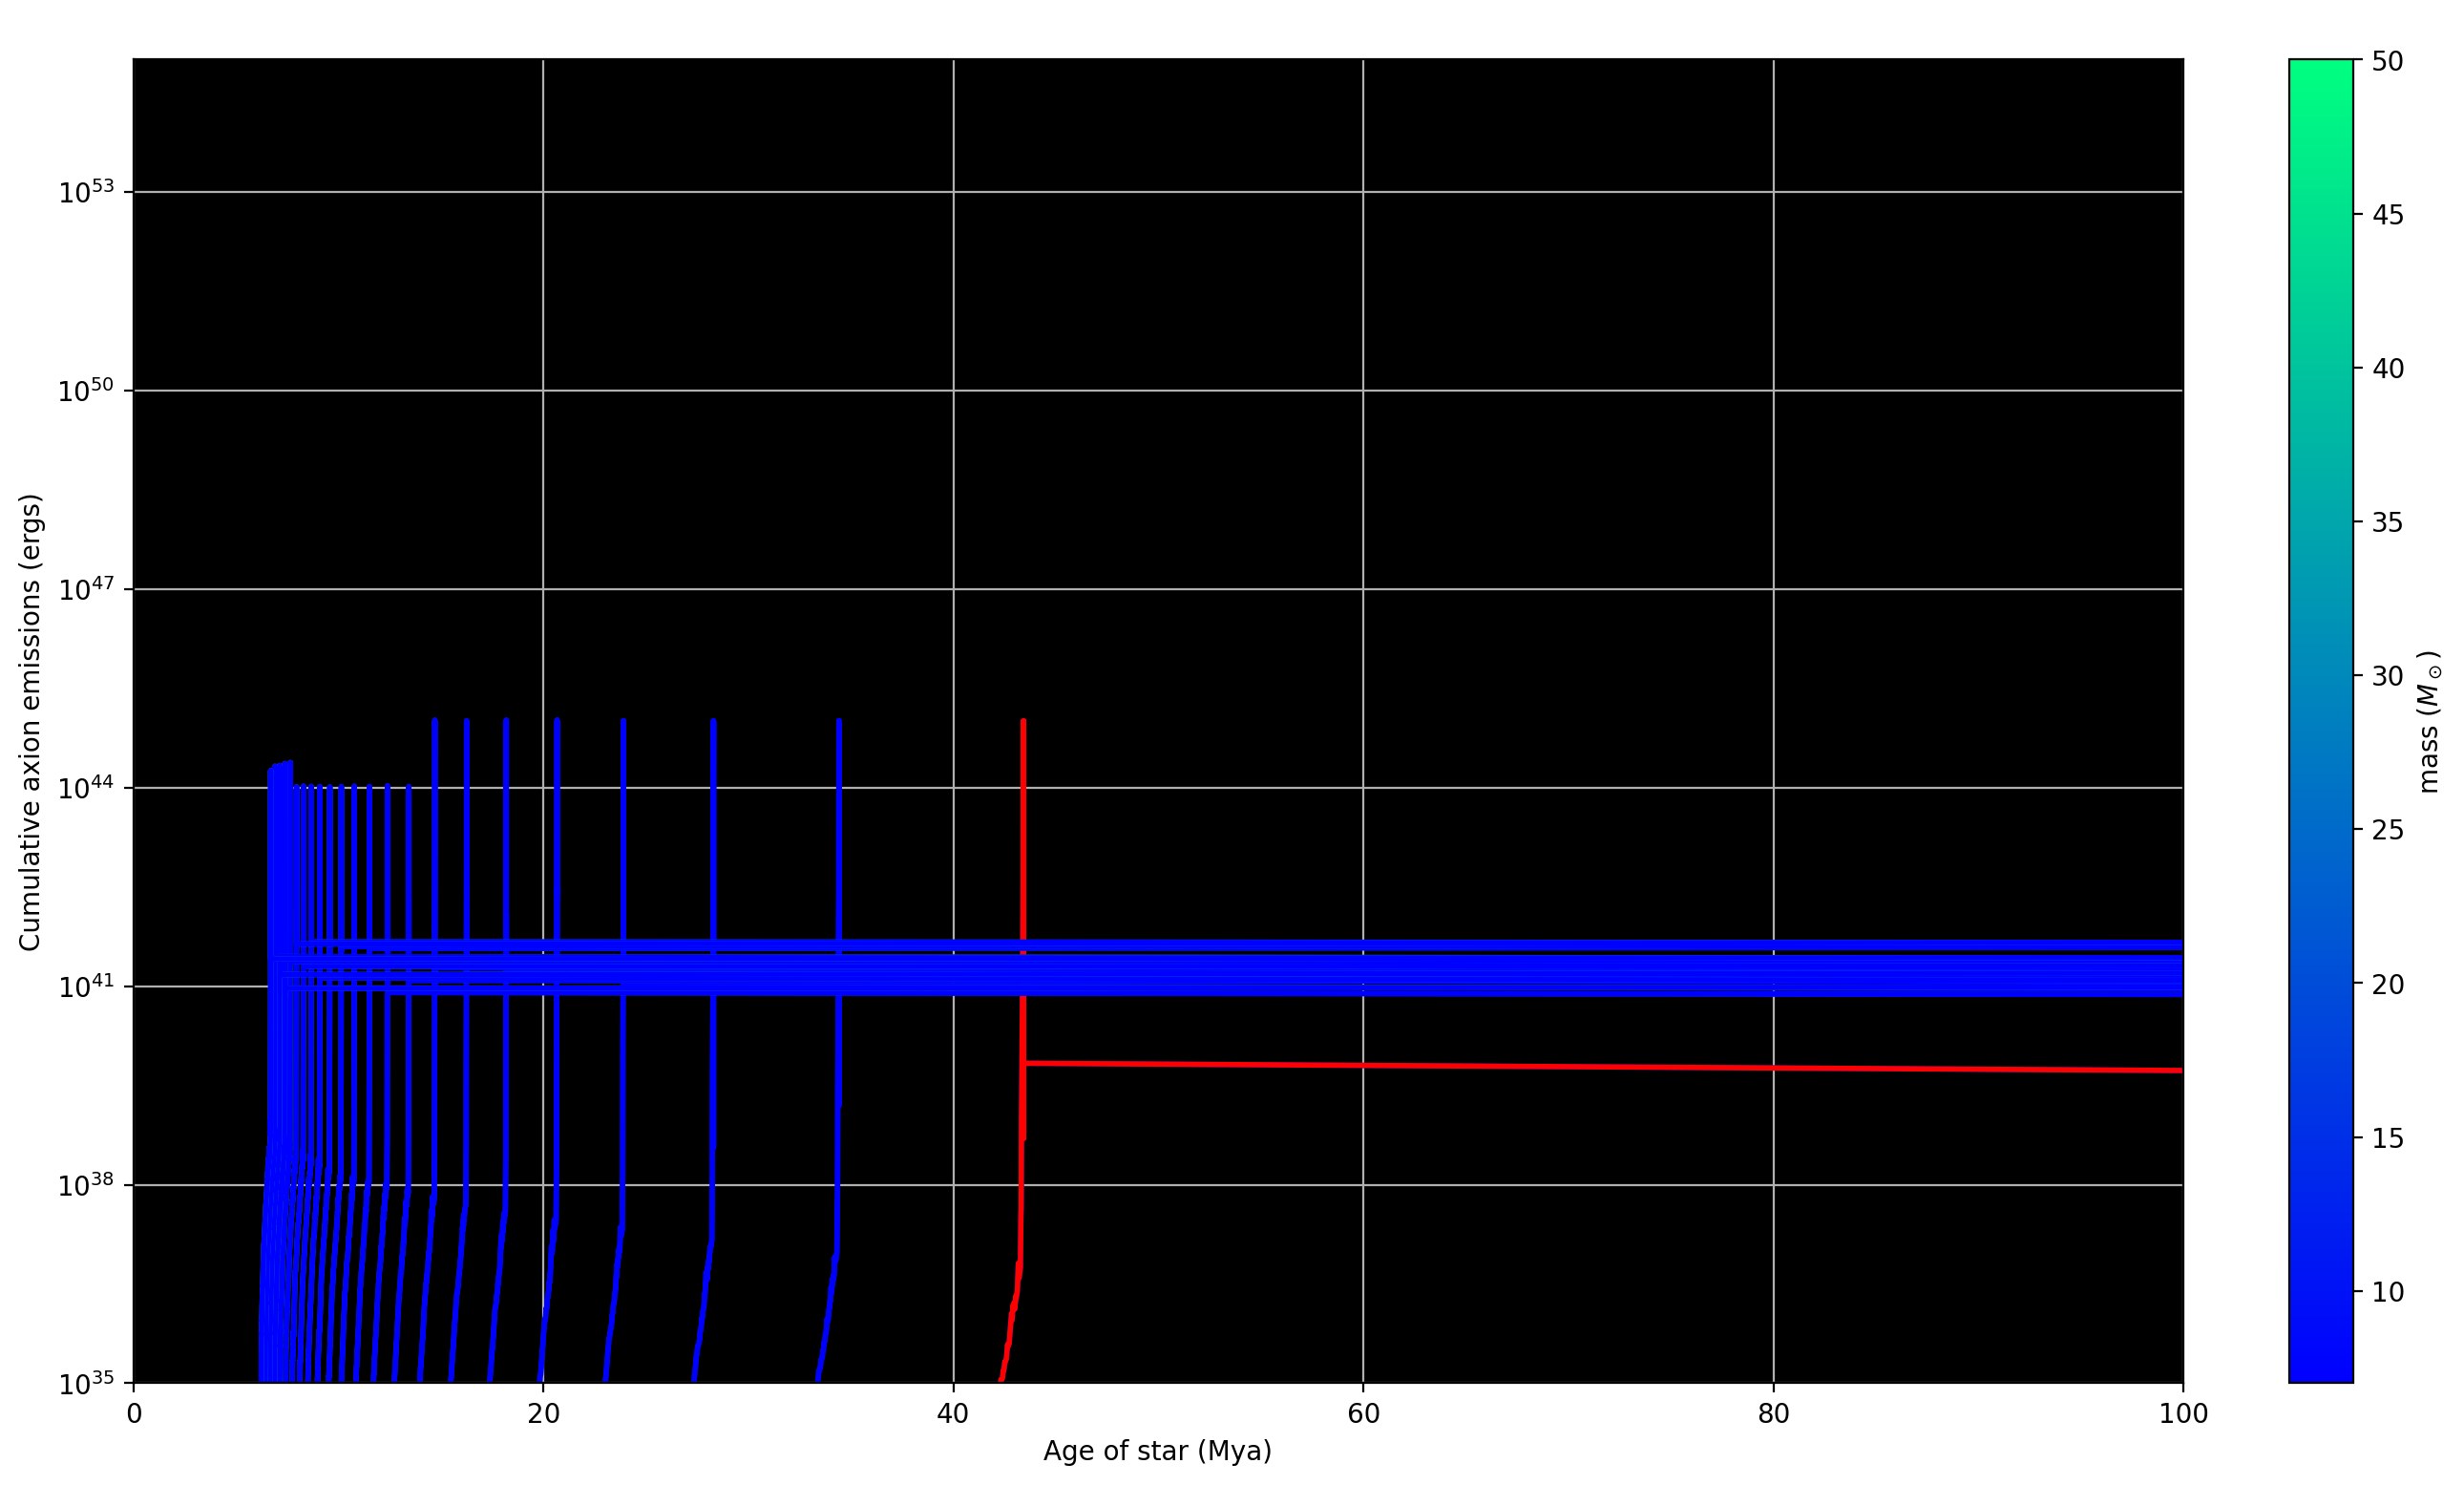

In [19]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    x[-1] = 100
    y = np.array(run['surface lum_a (ergs/s)'] * run['dt (years)'] * 3.154e+7)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e35, 1e55)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Cumulative axion emissions (ergs)')
plt.grid()

plt.title('Lifetime axion emissions (ergs)', c='white')
# plt.legend()
plt.show()

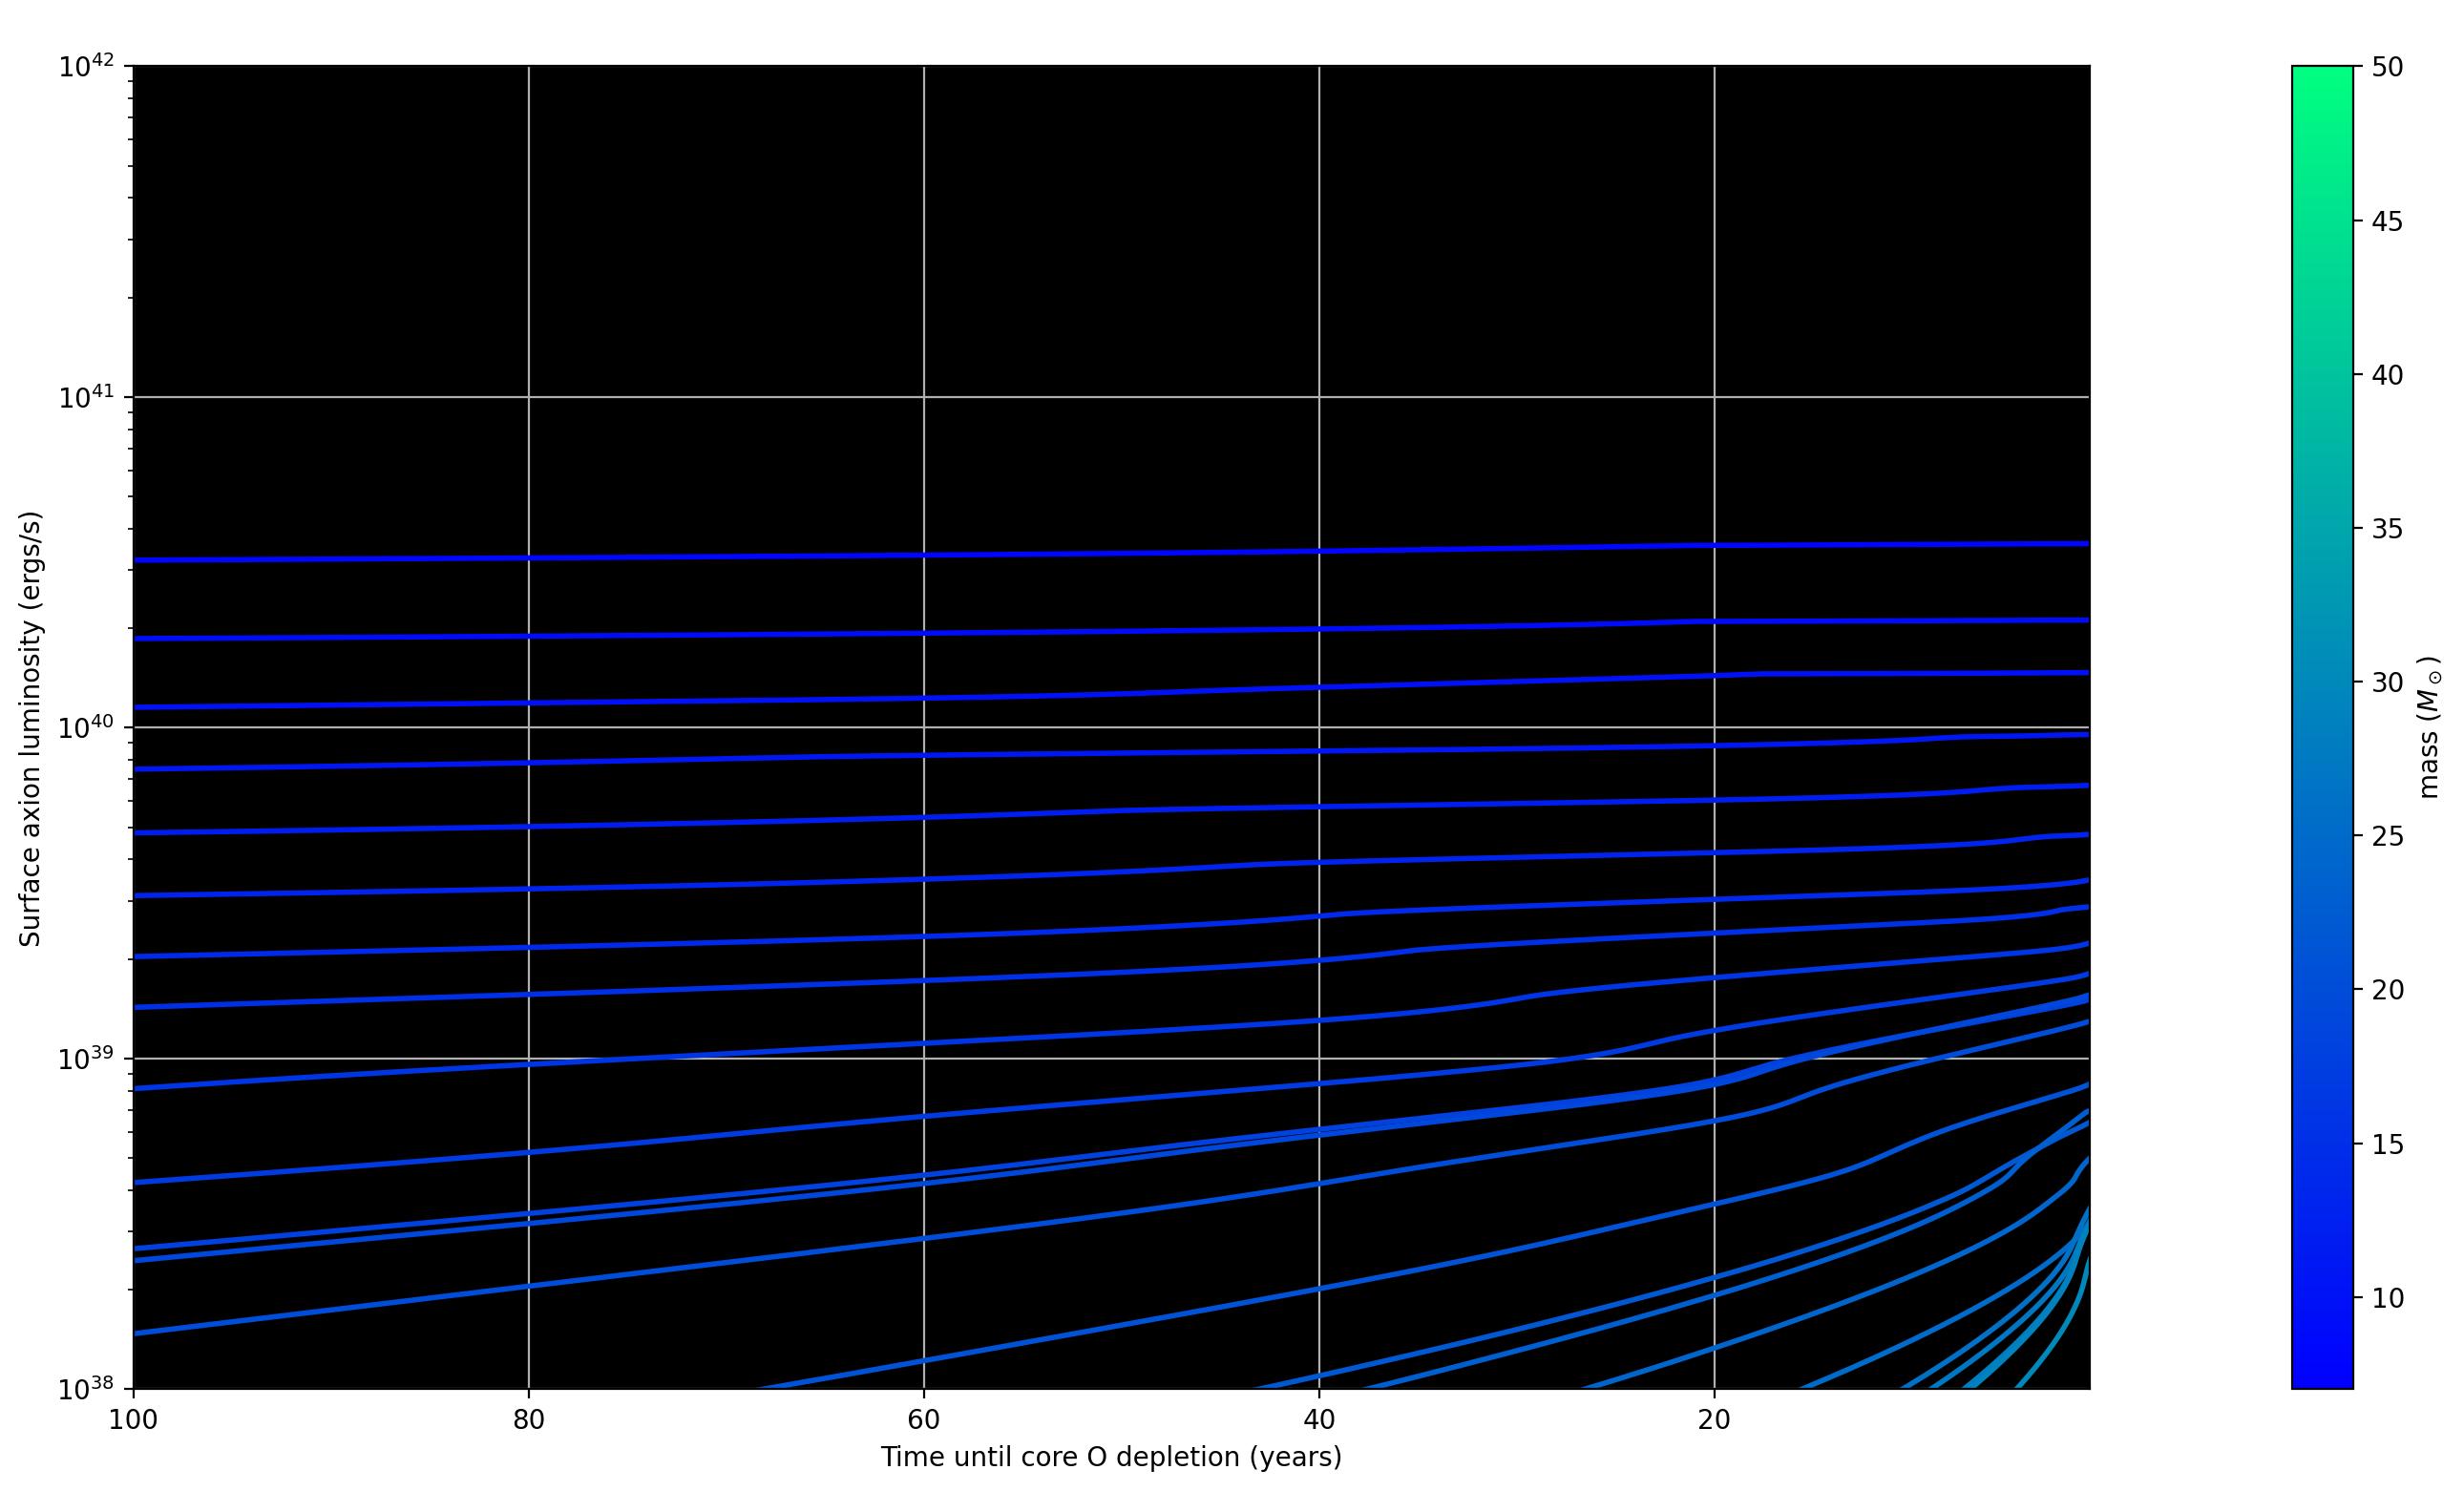

In [20]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['time to core O depletion (years)'])
    dt = np.array(run['dt (years)'])
    rate = np.array(run['surface lum_a (ergs/s)'])
    y = np.cumsum(rate * dt, axis=0)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))

plt.ylim(1e38, 1e42)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

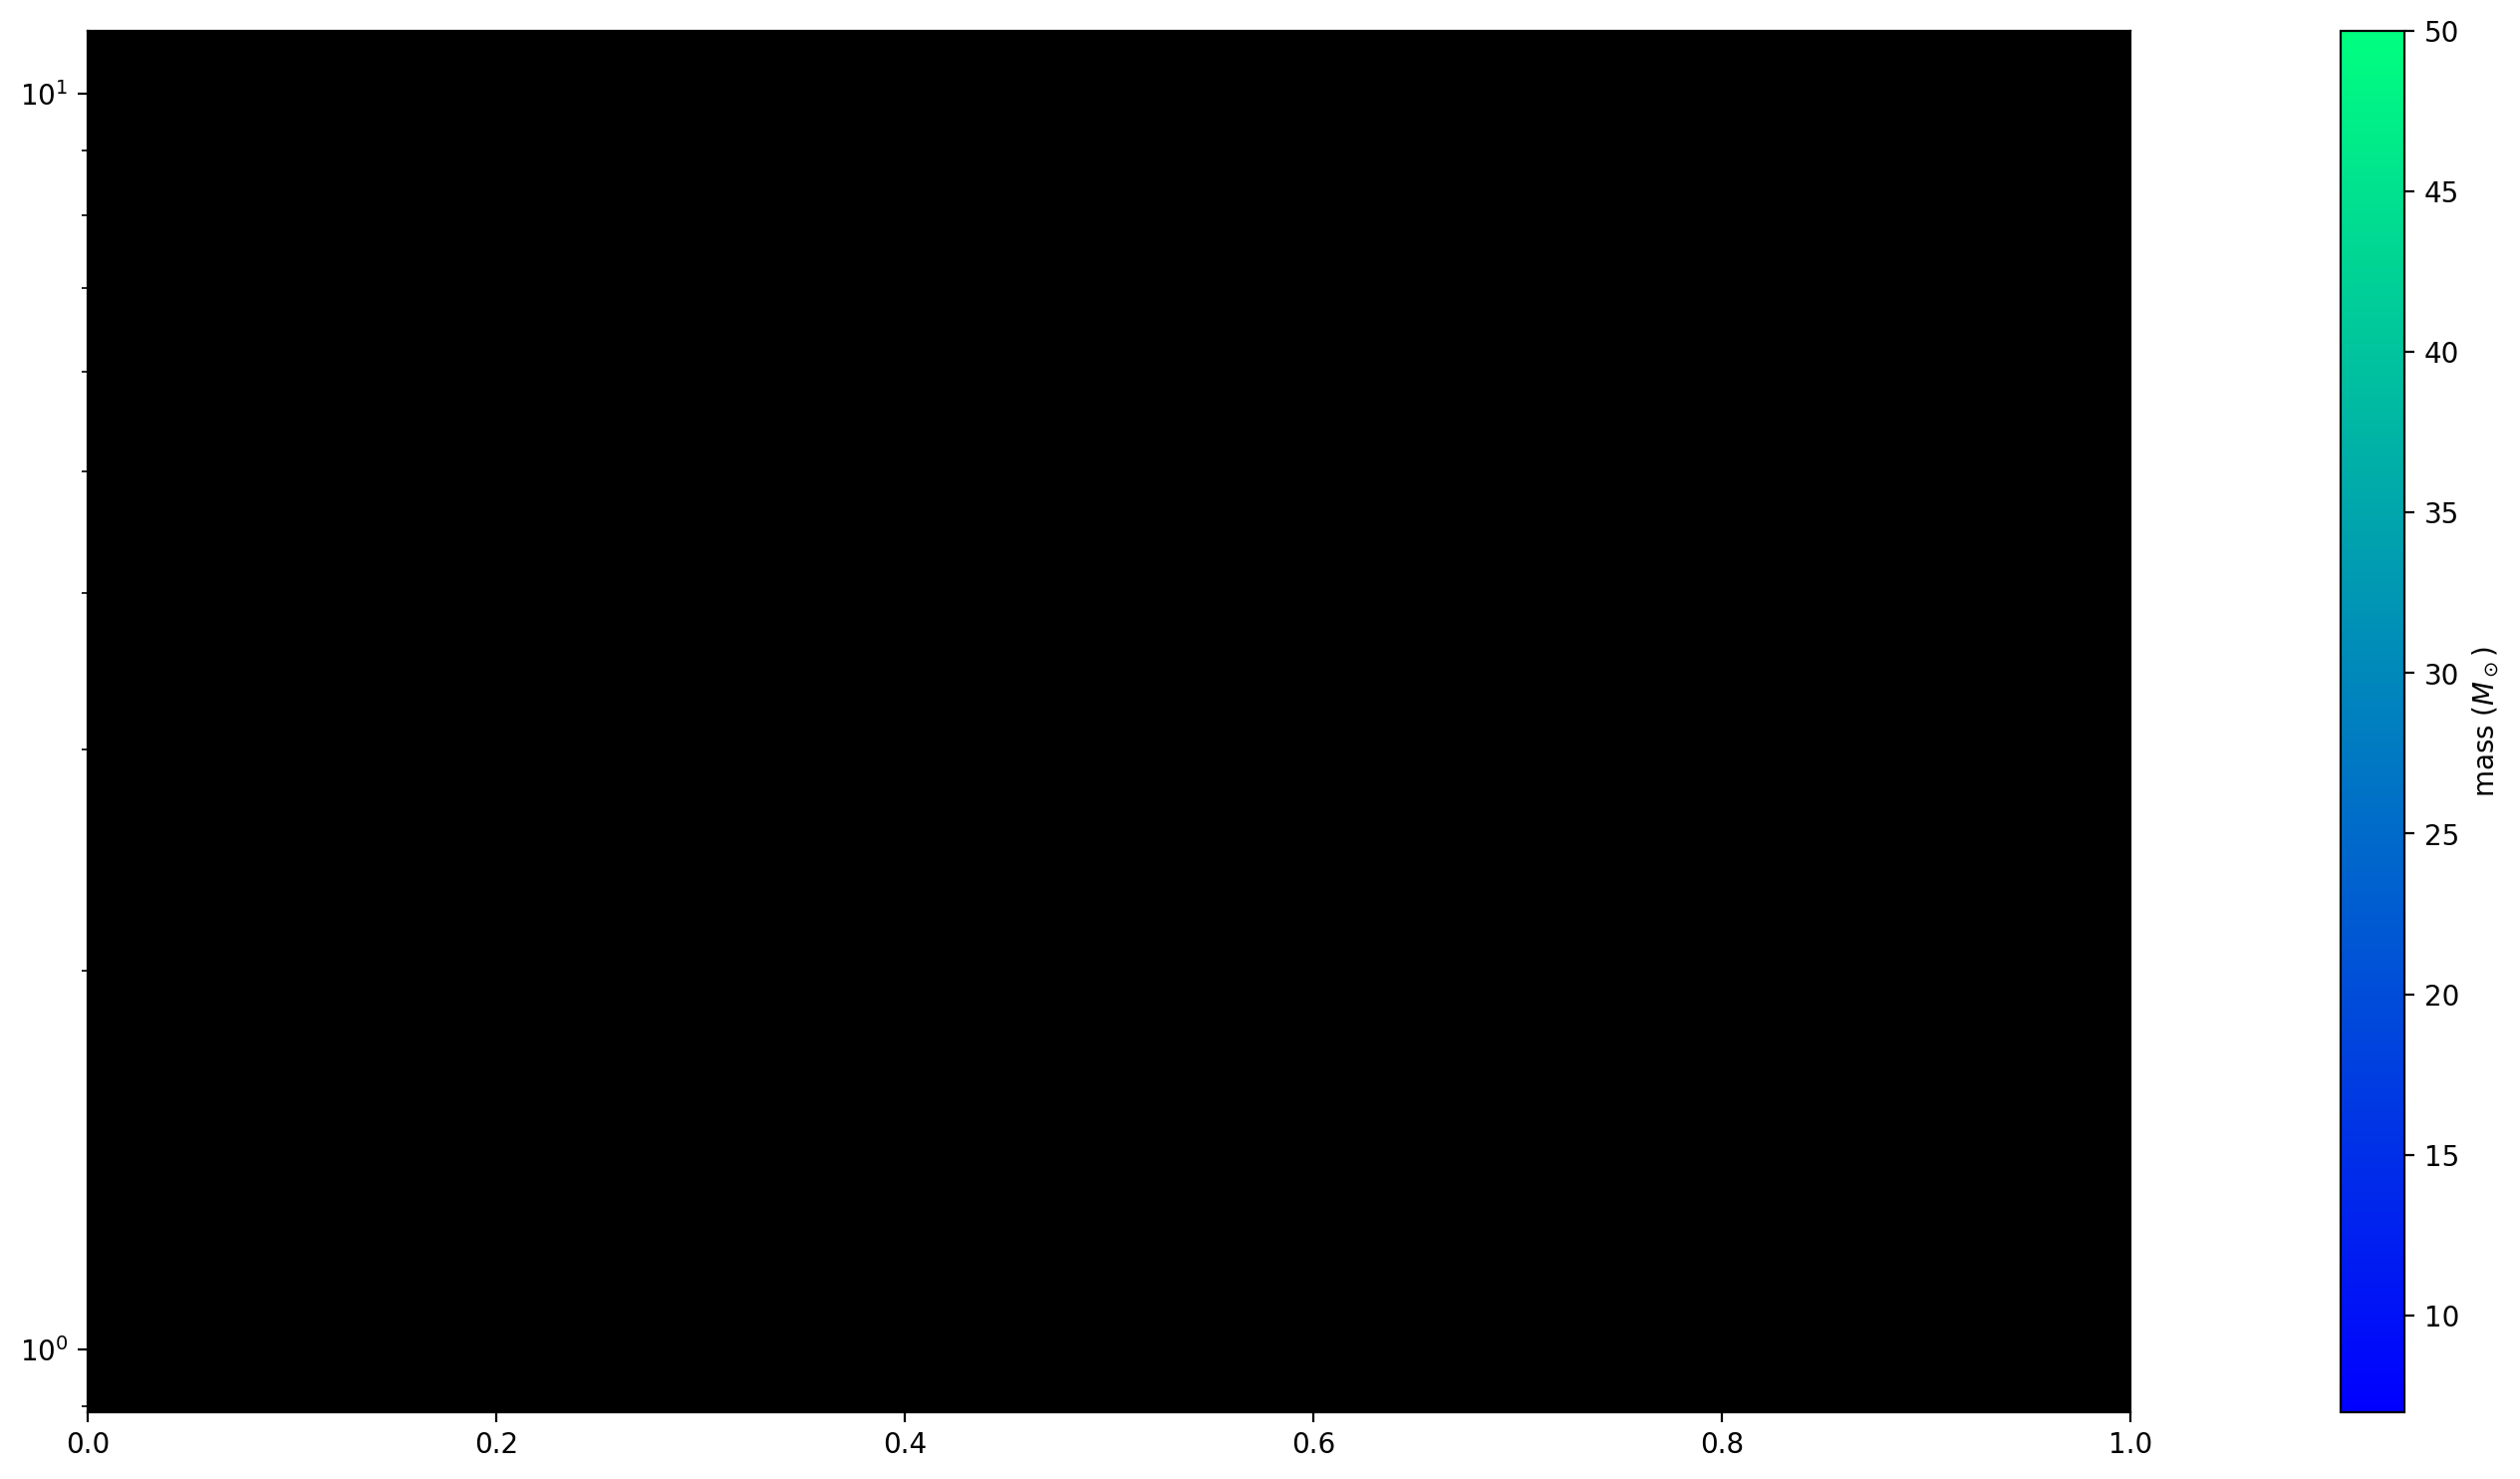

In [21]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e8, 1e10)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Core temperature (K)')
plt.grid()

plt.title('Core temperature', c='white')
plt.show()

In [ ]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['avg X_na23']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e-5, 1e-2)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Mass of 23Na / mass of star')
plt.grid()

plt.title('23Na mass fraction', c='white')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['age (years)']
    y = run['core T (K)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
# plt.ylim(1e20, 1e36)
# plt.xlim(1e6, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('core T (K)')
plt.grid()
plt.legend()

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
plt.ylim(1e30, 1e36)
plt.xlim(1e2, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('surface axion luminosity (ergs/s)')
plt.grid()
plt.legend()

In [ ]:
run = runs['g-7.0']
plt.plot(run['time to core O depletion (years)'], np.maximum(10, run['surface lum_a (ergs/s)']), lw=0.5)
# plt.xlim(1000, 0)

In [49]:
np.min(np.array(run['surface lum_a (ergs/s)']))

np.float64(-4.227117894505061e+36)